<a href="https://colab.research.google.com/github/SyedsProjectPortfolio45/Fifa-2019-Performance-Analysis/blob/main/Fifa_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# file path
import os

In [ ]:

%time data = pd.read_csv('Footballer.csv')

print(data.shape)

CPU times: user 240 ms, sys: 54.3 ms, total: 294 ms
Wall time: 300 ms
(18207, 89)


In [ ]:
data.head()

Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club  ... Composure Marking StandingTackle  SlidingTackle  \
0         FC Barcelona  ...      96.0    33.0           28.0           26.0   
1             Juventus  ...      95.0    28.0           31.0           23.0   
2  Paris Saint-Germain  ...      94.0    27.0           24.0           33.0   
3    Manchester United  ...      68.0    15.0           21.0           13.0   
4      Manchester City  ...      88.0    68.0           58.0           51.0   

  GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes Release Clause  
0      6.0        11.0       15.0           14.0        8.0        €226.5M  
1      7.0        11.0       15.0           14.0       11.0        €127.1M  
2      9.0         9.0       15.0           15.0       11.0        €228.1M  
3     90.0        85.0       87.0           88.0       94.0        €138.6M  
4     15.0        13.0        5.0           10.0       13.0        €196.4M  

[5 rows x 89 columns]

In [ ]:
data.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [ ]:
data.describe()

Unnamed: 0             ID           Age       Overall     Potential  \
count  18207.000000   18207.000000  18207.000000  18207.000000  18207.000000   
mean    9103.000000  214298.338606     25.122206     66.238699     71.307299   
std     5256.052511   29965.244204      4.669943      6.908930      6.136496   
min        0.000000      16.000000     16.000000     46.000000     48.000000   
25%     4551.500000  200315.500000     21.000000     62.000000     67.000000   
50%     9103.000000  221759.000000     25.000000     66.000000     71.000000   
75%    13654.500000  236529.500000     28.000000     71.000000     75.000000   
max    18206.000000  246620.000000     45.000000     94.000000     95.000000   

            Special  International Reputation     Weak Foot   Skill Moves  \
count  18207.000000              18159.000000  18159.000000  18159.000000   
mean    1597.809908                  1.113222      2.947299      2.361308   
std      272.586016                  0.394031      0.660456      0.756164   
min      731.000000                  1.000000      1.000000      1.000000   
25%     1457.000000                  1.000000      3.000000      2.000000   
50%     1635.000000                  1.000000      3.000000      2.000000   
75%     1787.000000                  1.000000      3.000000      3.000000   
max     2346.000000                  5.000000      5.000000      5.000000   

       Jersey Number  ...     Penalties     Composure       Marking  \
count   18147.000000  ...  18159.000000  18159.000000  18159.000000   
mean       19.546096  ...     48.548598     58.648274     47.281623   
std        15.947765  ...     15.704053     11.436133     19.904397   
min         1.000000  ...      5.000000      3.000000      3.000000   
25%         8.000000  ...     39.000000     51.000000     30.000000   
50%        17.000000  ...     49.000000     60.000000     53.000000   
75%        26.000000  ...     60.000000     67.000000     64.000000   
max        99.000000  ...     92.000000     96.000000     94.000000   

       StandingTackle  SlidingTackle      GKDiving    GKHandling  \
count    18159.000000   18159.000000  18159.000000  18159.000000   
mean        47.697836      45.661435     16.616223     16.391596   
std         21.664004      21.289135     17.695349     16.906900   
min          2.000000       3.000000      1.000000      1.000000   
25%         27.000000      24.000000      8.000000      8.000000   
50%         55.000000      52.000000     11.000000     11.000000   
75%         66.000000      64.000000     14.000000     14.000000   
max         93.000000      91.000000     90.000000     92.000000   

          GKKicking  GKPositioning    GKReflexes  
count  18159.000000   18159.000000  18159.000000  
mean      16.232061      16.388898     16.710887  
std       16.502864      17.034669     17.955119  
min        1.000000       1.000000      1.000000  
25%        8.000000       8.000000      8.000000  
50%       11.000000      11.000000     11.000000  
75%       14.000000      14.000000     14.000000  
max       91.000000      90.000000     94.000000  

[8 rows x 44 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [ ]:
data['ShortPassing'].fillna(data['ShortPassing'].mean(), inplace = True)
data['Volleys'].fillna(data['Volleys'].mean(), inplace = True)
data['Dribbling'].fillna(data['Dribbling'].mean(), inplace = True)
data['Curve'].fillna(data['Curve'].mean(), inplace = True)
data['FKAccuracy'].fillna(data['FKAccuracy'], inplace = True)
data['LongPassing'].fillna(data['LongPassing'].mean(), inplace = True)
data['BallControl'].fillna(data['BallControl'].mean(), inplace = True)
data['HeadingAccuracy'].fillna(data['HeadingAccuracy'].mean(), inplace = True)
data['Finishing'].fillna(data['Finishing'].mean(), inplace = True)
data['Crossing'].fillna(data['Crossing'].mean(), inplace = True)
data['Weight'].fillna('200lbs', inplace = True)
data['Contract Valid Until'].fillna(2019, inplace = True)
data['Height'].fillna("5'11", inplace = True)
data['Loaned From'].fillna('None', inplace = True)
data['Joined'].fillna('Jul 1, 2018', inplace = True)
data['Jersey Number'].fillna(8, inplace = True)
data['Body Type'].fillna('Normal', inplace = True)
data['Position'].fillna('ST', inplace = True)
data['Club'].fillna('No Club', inplace = True)
data['Work Rate'].fillna('Medium/ Medium', inplace = True)
data['Skill Moves'].fillna(data['Skill Moves'].median(), inplace = True)
data['Weak Foot'].fillna(3, inplace = True)
data['Preferred Foot'].fillna('Right', inplace = True)
data['International Reputation'].fillna(1, inplace = True)
data['Wage'].fillna('€200K', inplace = True)

In [ ]:
data.fillna(0, inplace = True)

In [ ]:
def defending(data):
    return int(round((data[['Marking', 'StandingTackle',
                               'SlidingTackle']].mean()).mean()))

def general(data):
    return int(round((data[['HeadingAccuracy', 'Dribbling', 'Curve',
                               'BallControl']].mean()).mean()))

def mental(data):
    return int(round((data[['Aggression', 'Interceptions', 'Positioning',
                               'Vision','Composure']].mean()).mean()))

def passing(data):
    return int(round((data[['Crossing', 'ShortPassing',
                               'LongPassing']].mean()).mean()))

def mobility(data):
    return int(round((data[['Acceleration', 'SprintSpeed',
                               'Agility','Reactions']].mean()).mean()))
def power(data):
    return int(round((data[['Balance', 'Jumping', 'Stamina',
                               'Strength']].mean()).mean()))

def rating(data):
    return int(round((data[['Potential', 'Overall']].mean()).mean()))

def shooting(data):
    return int(round((data[['Finishing', 'Volleys', 'FKAccuracy',
                               'ShotPower','LongShots', 'Penalties']].mean()).mean()))

In [ ]:
# renaming a column
data.rename(columns={'Club Logo':'Club_Logo'}, inplace=True)

# adding these categories to the data

data['Defending'] = data.apply(defending, axis = 1)
data['General'] = data.apply(general, axis = 1)
data['Mental'] = data.apply(mental, axis = 1)
data['Passing'] = data.apply(passing, axis = 1)
data['Mobility'] = data.apply(mobility, axis = 1)
data['Power'] = data.apply(power, axis = 1)
data['Rating'] = data.apply(rating, axis = 1)
data['Shooting'] = data.apply(shooting, axis = 1)

In [ ]:
players = data[['Name','Defending','General','Mental','Passing',
                'Mobility','Power','Rating','Shooting','Flag','Age',
                'Nationality', 'Photo', 'Club_Logo', 'Club']]

players.head()

Name  Defending  General  Mental  Passing  Mobility  Power  \
0           L. Messi         29       89      71       87        91     74   
1  Cristiano Ronaldo         27       88      73       81        91     83   
2          Neymar Jr         28       85      72       80        94     69   
3             De Gea         16       26      43       39        66     54   
4       K. De Bruyne         59       79      81       92        81     76   

   Rating  Shooting                                 Flag  Age Nationality  \
0      94        88  https://cdn.sofifa.org/flags/52.png   31   Argentina   
1      94        88  https://cdn.sofifa.org/flags/38.png   33    Portugal   
2      92        84  https://cdn.sofifa.org/flags/54.png   26      Brazil   
3      92        21  https://cdn.sofifa.org/flags/45.png   27       Spain   
4      92        85   https://cdn.sofifa.org/flags/7.png   27     Belgium   

                                            Photo  \
0  https://cdn.sofifa.org/players/4/19/158023.png   
1   https://cdn.sofifa.org/players/4/19/20801.png   
2  https://cdn.sofifa.org/players/4/19/190871.png   
3  https://cdn.sofifa.org/players/4/19/193080.png   
4  https://cdn.sofifa.org/players/4/19/192985.png   

                                      Club_Logo                 Club  
0  https://cdn.sofifa.org/teams/2/light/241.png         FC Barcelona  
1   https://cdn.sofifa.org/teams/2/light/45.png             Juventus  
2   https://cdn.sofifa.org/teams/2/light/73.png  Paris Saint-Germain  
3   https://cdn.sofifa.org/teams/2/light/11.png    Manchester United  
4   https://cdn.sofifa.org/teams/2/light/10.png      Manchester City

In [ ]:
import requests
import random
from math import pi

import matplotlib.image as mpimg
from matplotlib.offsetbox import (OffsetImage,AnnotationBbox)

def details(row, title, image, age, nationality, photo, logo, club):

    flag_image = "img_flag.jpg"
    player_image = "img_player.jpg"
    logo_image = "img_club_logo.jpg"

    img_flag = requests.get(image).content
    with open(flag_image, 'wb') as handler:
        handler.write(img_flag)

    player_img = requests.get(photo).content
    with open(player_image, 'wb') as handler:
        handler.write(player_img)

    logo_img = requests.get(logo).content
    with open(logo_image, 'wb') as handler:
        handler.write(logo_img)

    r = lambda: random.randint(0,255)
    colorRandom = '#%02X%02X%02X' % (r(),r(),r())

    if colorRandom == '#ffffff':colorRandom = '#a5d6a7'

    basic_color = '#37474f'
    color_annotate = '#01579b'

    img = mpimg.imread(flag_image)

    plt.figure(figsize=(15,8))
    categories=list(players)[1:]
    coulumnDontUseGraph = ['Flag', 'Age', 'Nationality', 'Photo', 'Logo', 'Club']
    N = len(categories) - len(coulumnDontUseGraph)

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    ax = plt.subplot(111, projection='polar')
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], categories, color= 'black', size=17)
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75,100], ["25","50","75","100"], color= basic_color, size= 10)
    plt.ylim(0,100)

    values = players.loc[row].drop('Name').values.flatten().tolist()
    valuesDontUseGraph = [image, age, nationality, photo, logo, club]
    values = [e for e in values if e not in (valuesDontUseGraph)]
    values += values[:1]

    ax.plot(angles, values, color= basic_color, linewidth=1, linestyle='solid')
    ax.fill(angles, values, color= colorRandom, alpha=0.5)
    axes_coords = [0, 0, 1, 1]
    ax_image = plt.gcf().add_axes(axes_coords,zorder= -1)
    ax_image.imshow(img,alpha=0.5)
    ax_image.axis('off')

    ax.annotate('Nationality: ' + nationality.upper(), xy=(10,10), xytext=(103, 138),
                fontsize= 12,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})

    ax.annotate('Age: ' + str(age), xy=(10,10), xytext=(43, 180),
                fontsize= 15,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})

    ax.annotate('Team: ' + club.upper(), xy=(10,10), xytext=(92, 168),
                fontsize= 12,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})

    arr_img_player = plt.imread(player_image, format='jpg')

    imagebox_player = OffsetImage(arr_img_player)
    imagebox_player.image.axes = ax
    abPlayer = AnnotationBbox(imagebox_player, (0.5, 0.7),
                        xybox=(313, 223),
                        xycoords='data',
                        boxcoords="offset points"
                        )
    arr_img_logo = plt.imread(logo_image, format='jpg')

    imagebox_logo = OffsetImage(arr_img_logo)
    imagebox_logo.image.axes = ax
    abLogo = AnnotationBbox(imagebox_logo, (0.5, 0.7),
                        xybox=(-320, -226),
                        xycoords='data',
                        boxcoords="offset points"
                        )

    ax.add_artist(abPlayer)
    ax.add_artist(abLogo)

    plt.title(title, size=50, color= basic_color)

In [ ]:
# defining a polar graph

def graphPolar(id = 0):
    if 0 <= id < len(data.ID):
        details(row = players.index[id],
                title = players['Name'][id],
                age = players['Age'][id],
                photo = players['Photo'][id],
                nationality = players['Nationality'][id],
                image = players['Flag'][id],
                logo = players['Club_Logo'][id],
                club = players['Club'][id])
    else:
        print('The base has 17917 players. You can put positive numbers from 0 to 17917')

In [ ]:
graphPolar(0)

ConnectionError: ignored

Text(0.5, 1.0, 'Most Preferred Foot of the Players')

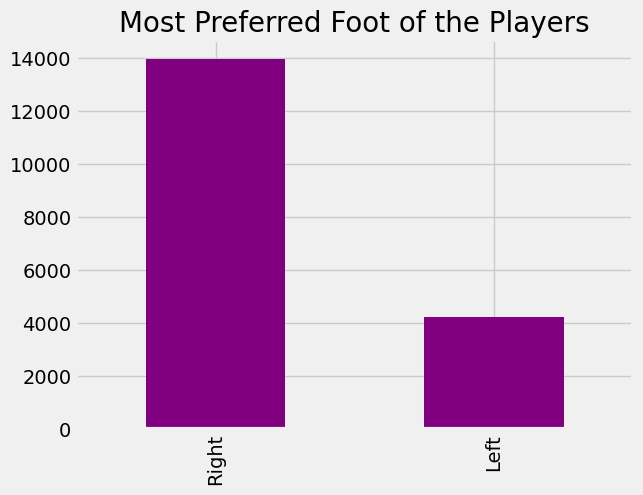

In [ ]:
data['Preferred Foot'].value_counts().head(50).plot.bar(color = 'purple')
plt.title('Most Preferred Foot of the Players', fontsize = 20)

In [ ]:
#  comparison of international reputation among the players

data['International Reputation'].value_counts()

1.0    16580
2.0     1261
3.0      309
4.0       51
5.0        6
Name: International Reputation, dtype: int64

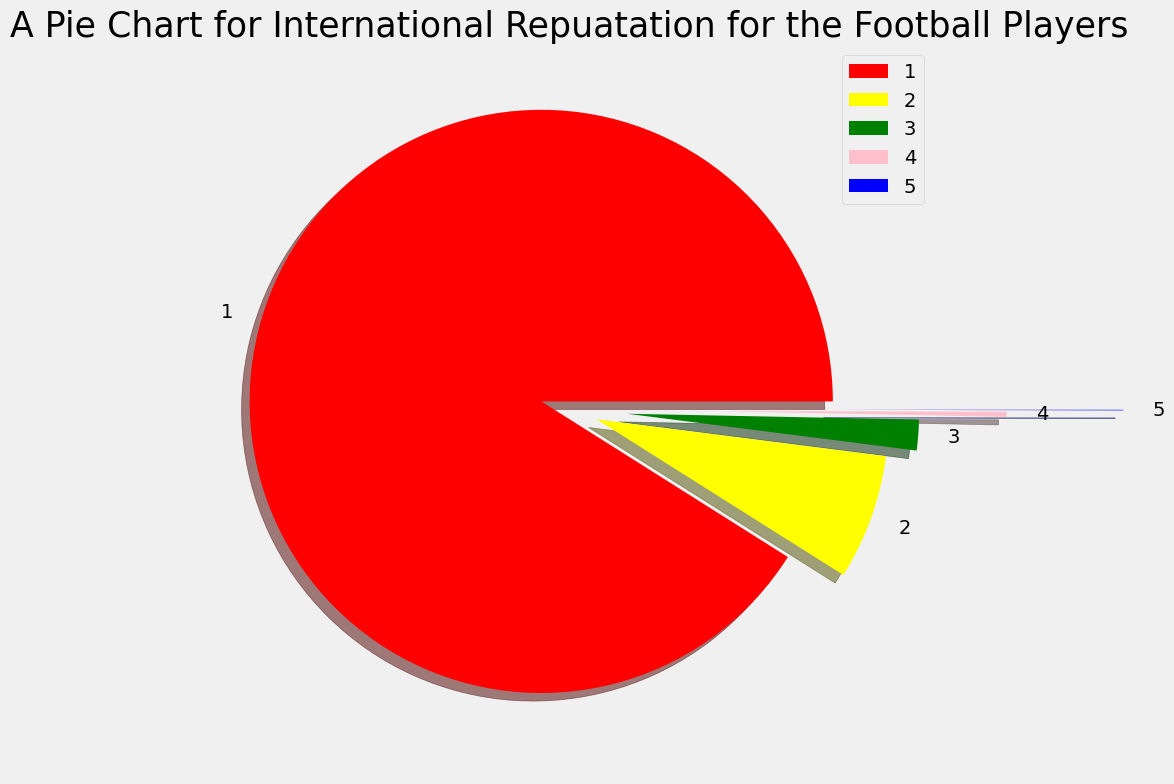

In [ ]:
# plotting a pie chart to represent share of international repuatation

labels = ['1', '2', '3', '4', '5']
sizes = [16532, 1261, 309, 51, 6]
colors = ['red', 'yellow', 'green', 'pink', 'blue']
explode = [0.1, 0.1, 0.2, 0.5, 0.9]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True)
plt.title('A Pie Chart for International Repuatation for the Football Players', fontsize = 25)
plt.legend()
plt.show()

In [ ]:
# A player's foot (left or right) that is weaker than their preferred foot. A player's attribute rated between 1 to 5
# which specifies the shot power and ball control for the other foot of that player than his preferred foot's.The higher
# rate defines the higher shot power and ball control.

data['Weak Foot'].value_counts()

3.0    11397
2.0     3761
4.0     2662
5.0      229
1.0      158
Name: Weak Foot, dtype: int64

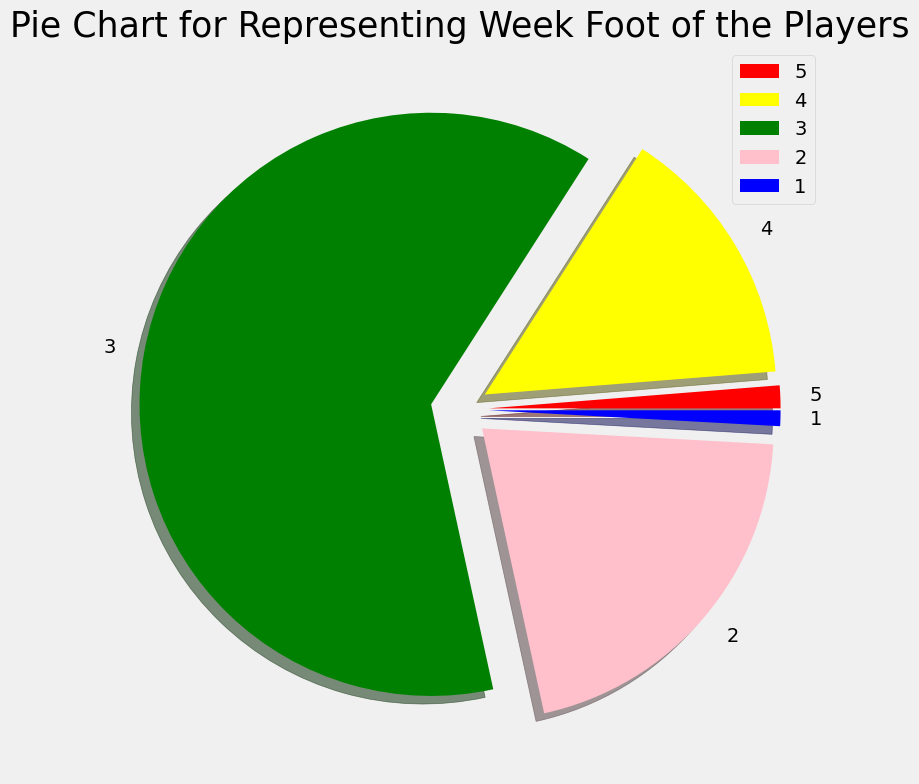

In [ ]:
# plotting a pie chart to represent the share of week foot players

labels = ['5', '4', '3', '2', '1']
size = [229, 2662, 11349, 3761, 158]
colors = ['red', 'yellow', 'green', 'pink', 'blue']
explode = [0.1, 0.1, 0.1, 0.1, 0.1]

plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True)
plt.title('Pie Chart for Representing Week Foot of the Players', fontsize = 25)
plt.legend()
plt.show()

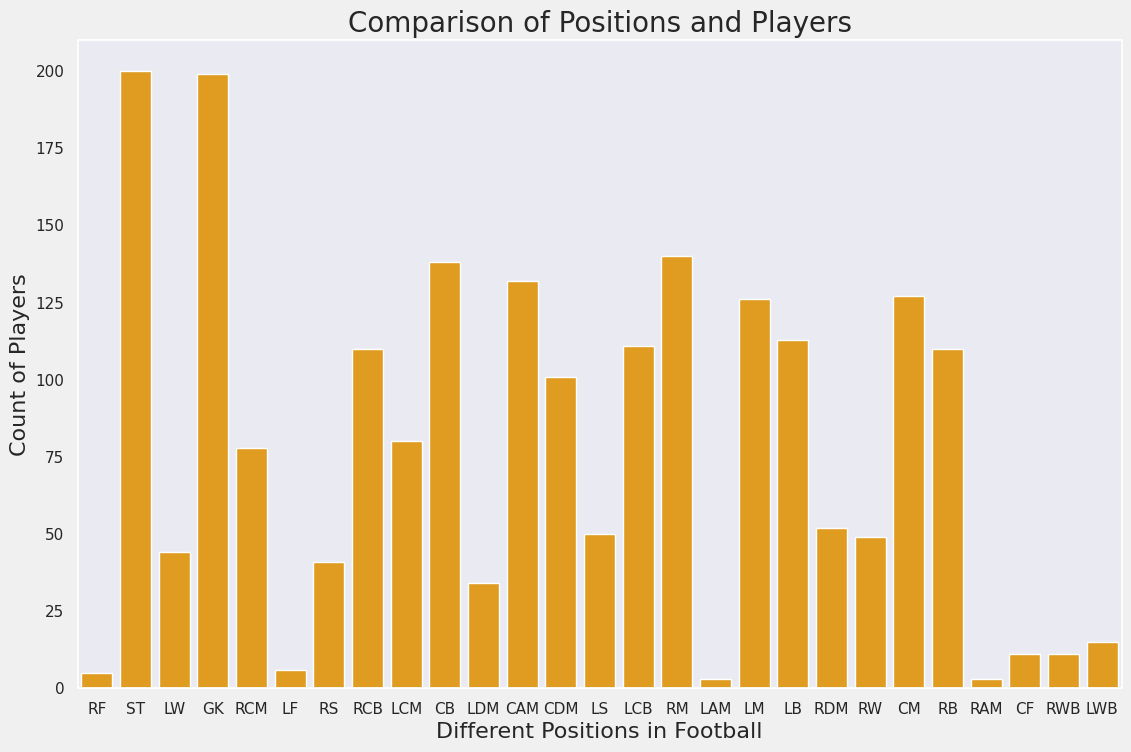

In [ ]:
# different positions acquired by the players

plt.figure(figsize = (12, 8))
sns.set(style = 'dark', palette = 'colorblind', color_codes = True)
ax = sns.countplot(x=data['Position'], data = data, color = 'orange')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
plt.show()

In [ ]:
# defining a function for cleaning the Weight data

def extract_value_from(value):
  out = value.replace('lbs', '')
  return float(out)

# applying the function to weight column
#data['value'] = data['value'].apply(lambda x: extract_value_from(x))
data['Weight'] = data['Weight'].apply(lambda x : extract_value_from(x))

data['Weight'].head()

0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64

In [ ]:
# defining a function for cleaning the wage column

def extract_value_from(Value):
    out = Value.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M', ''))*1000000
    elif 'K' in Value:
        out = float(out.replace('K', ''))*1000
    return float(out)

In [ ]:
# applying the function to the wage column

data['Value'] = data['Value'].apply(lambda x: extract_value_from(x))
data['Wage'] = data['Wage'].apply(lambda x: extract_value_from(x))

data['Wage'].head()

0    565000.0
1    405000.0
2    290000.0
3    260000.0
4    355000.0
Name: Wage, dtype: float64

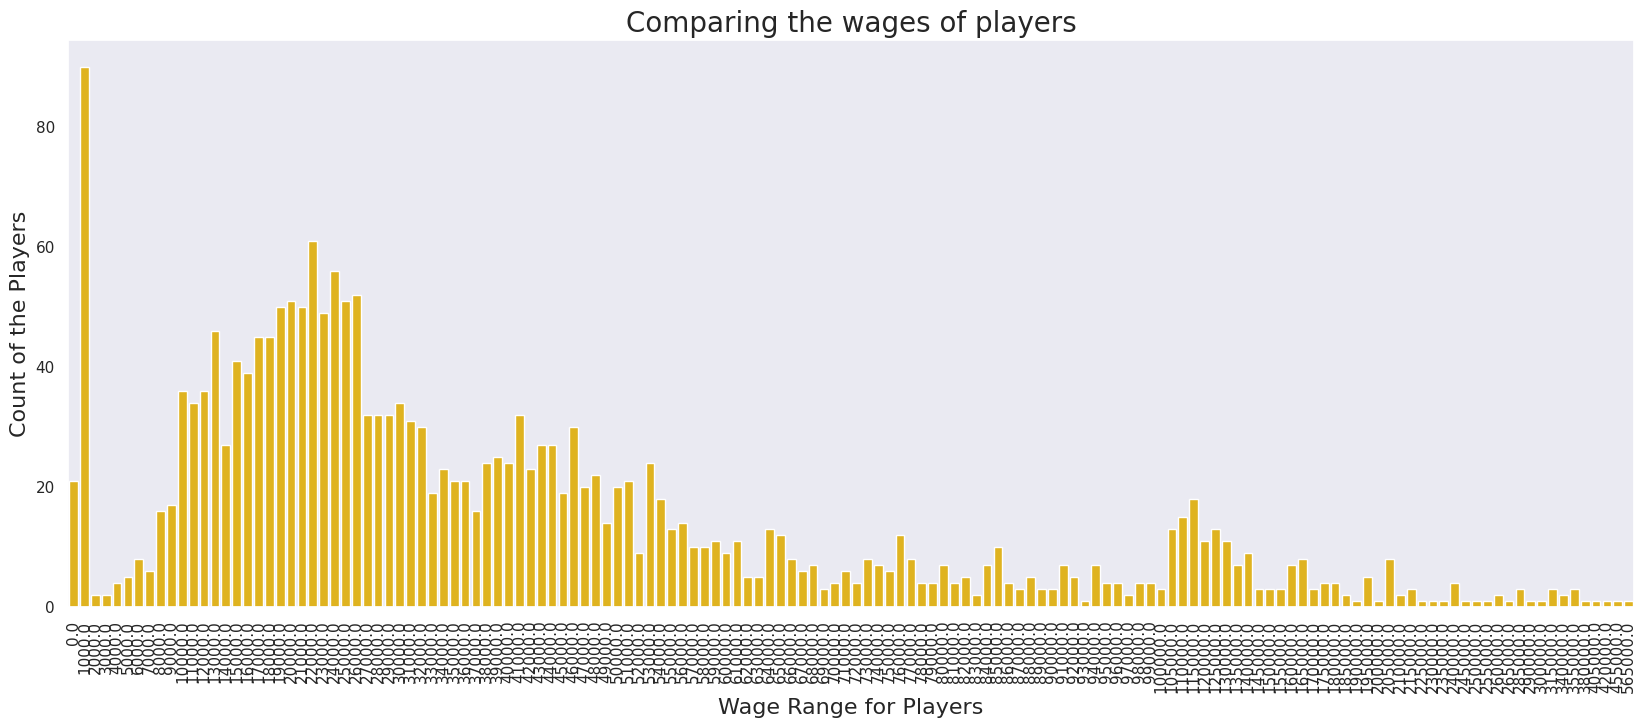

In [ ]:
sns.set(style = 'dark', palette = 'bright', color_codes = True)
x = data.Wage
plt.rcParams['figure.figsize'] = (18, 7)
sns.countplot(x=data['Wage'], data = data, color = 'y')
plt.xlabel('Wage Range for Players', fontsize = 16)
plt.ylabel('Count of the Players', fontsize = 16)
plt.title('Comparing the wages of players', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

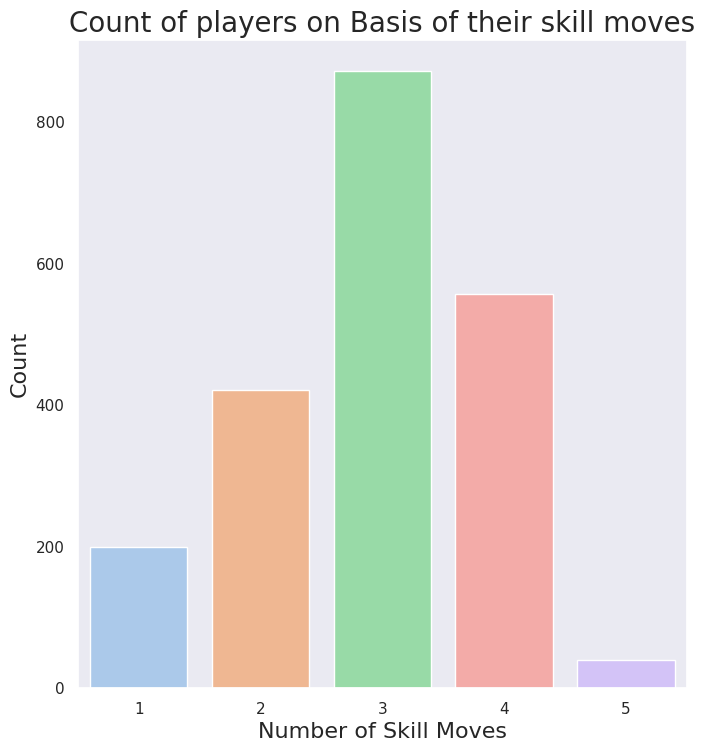

In [ ]:
# Skill Moves of Players

plt.figure(figsize = (7, 8))
ax = sns.countplot(x = 'Skill Moves', data = data, palette = 'pastel')
ax.set_title(label = 'Count of players on Basis of their skill moves', fontsize = 20)
ax.set_xlabel(xlabel = 'Number of Skill Moves', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

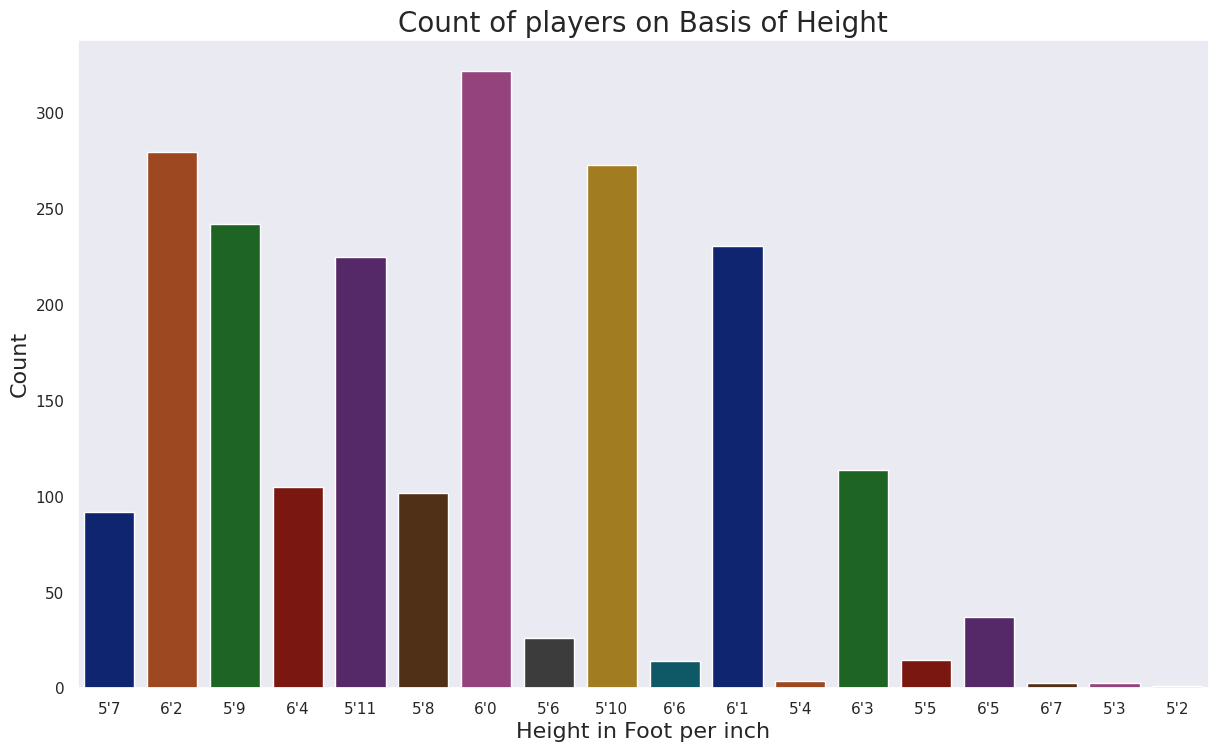

In [ ]:
# Height of Players

plt.figure(figsize = (13, 8))
ax = sns.countplot(x = 'Height', data = data, palette = 'dark')
ax.set_title(label = 'Count of players on Basis of Height', fontsize = 20)
ax.set_xlabel(xlabel = 'Height in Foot per inch', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

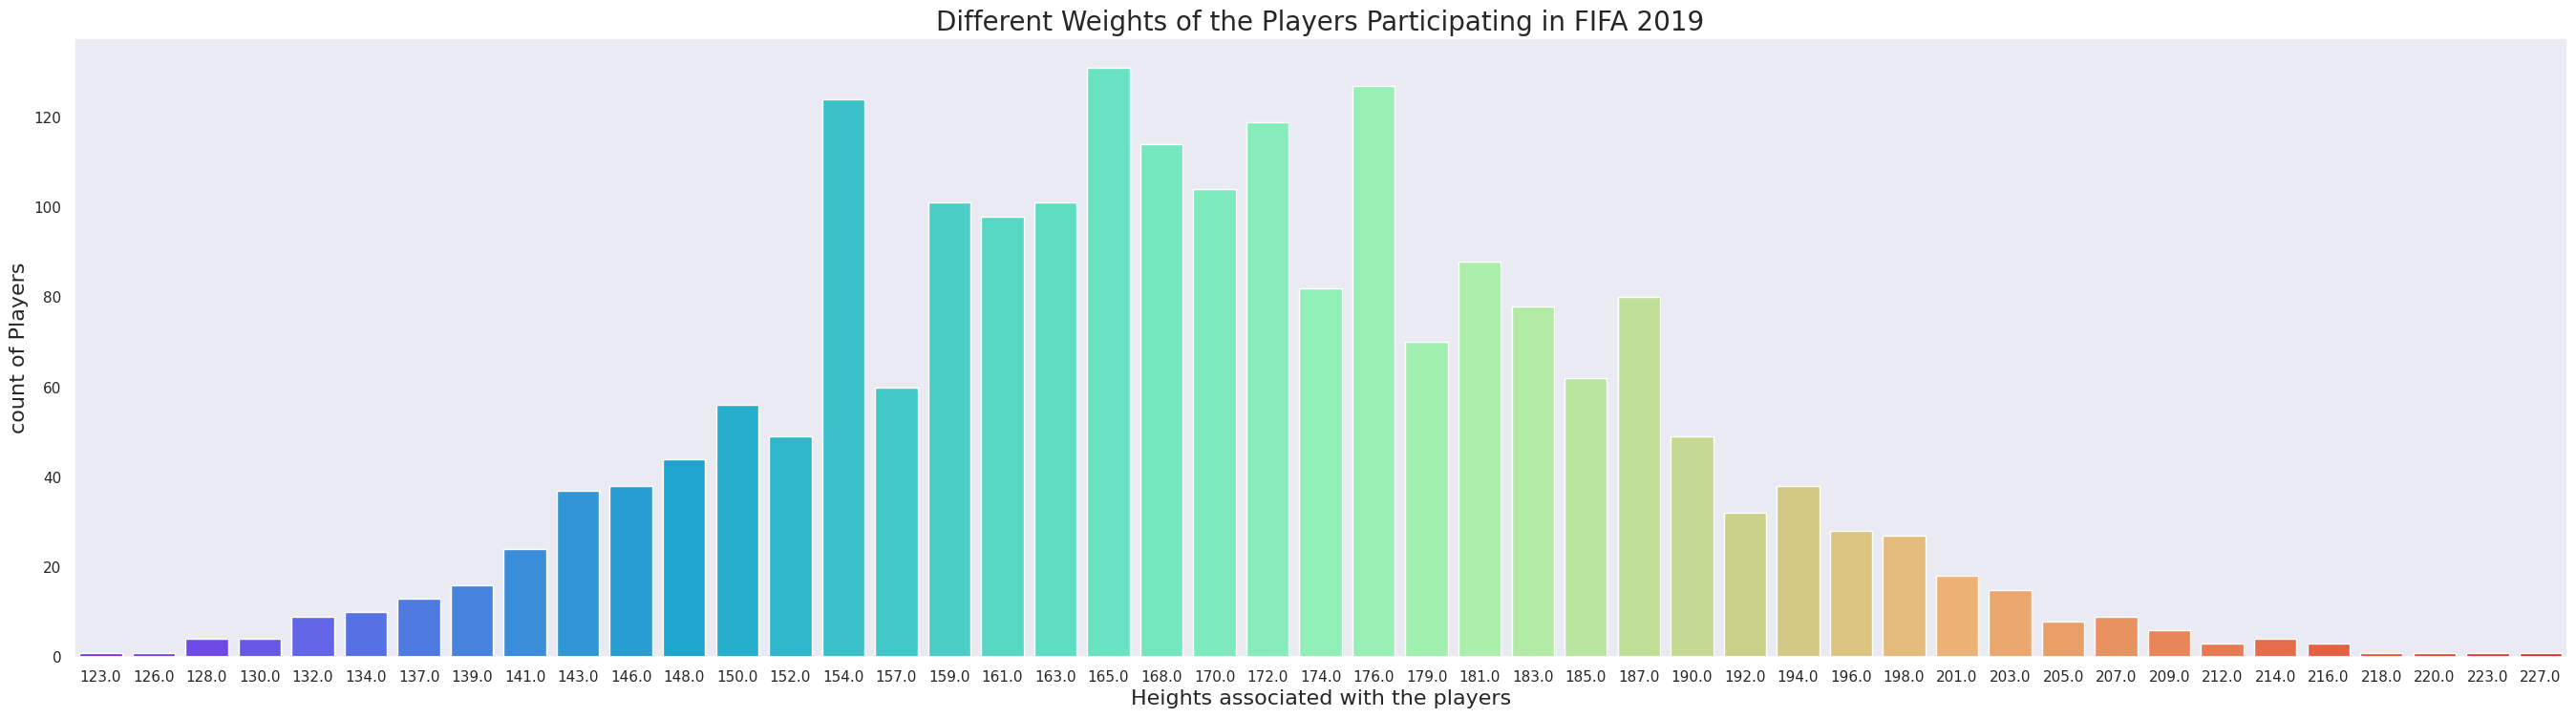

In [ ]:
# To show Different body weight of the players participating in the FIFA 2019

plt.figure(figsize = (30, 8))
sns.countplot(x = data['Weight'], data = data, palette = 'rainbow')
plt.title('Different Weights of the Players Participating in FIFA 2019', fontsize = 20)
plt.xlabel('Heights associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.show()

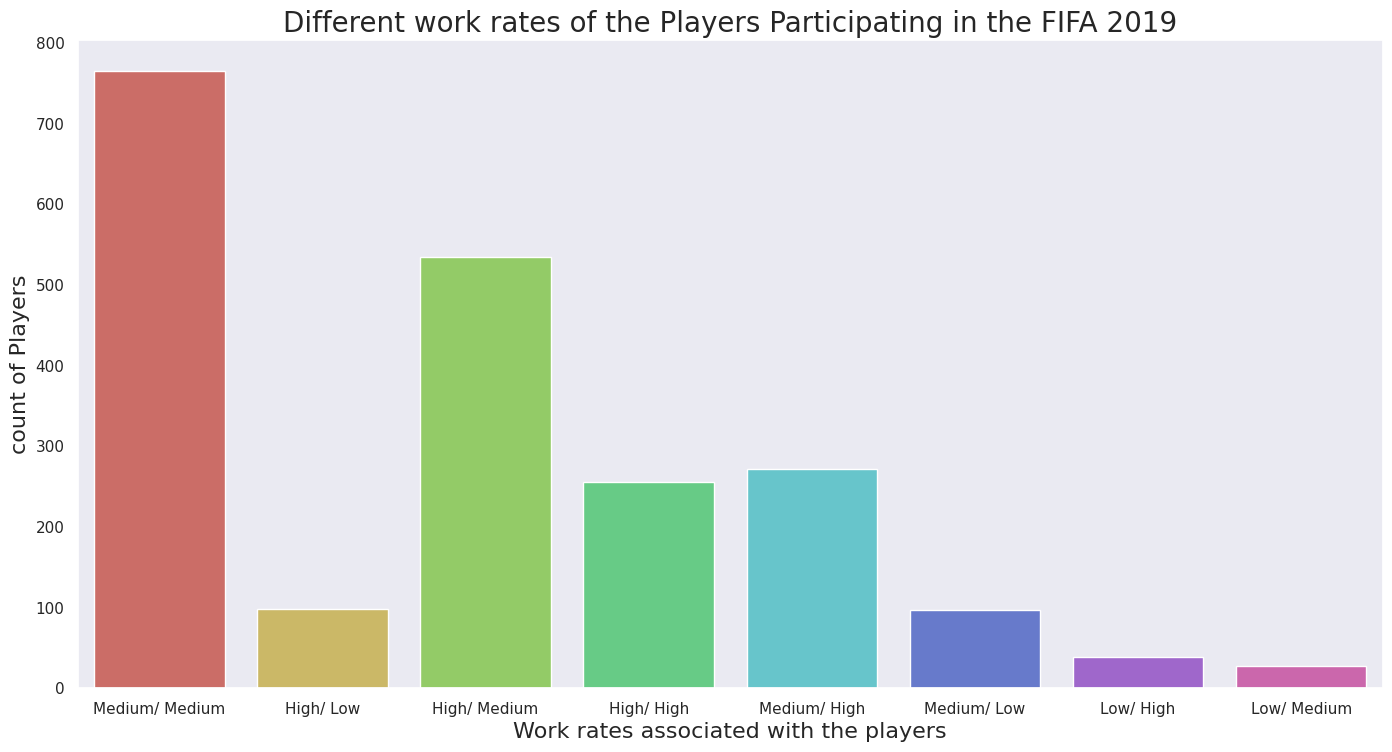

In [ ]:
# To show Different Work rate of the players participating in the FIFA 2019

plt.figure(figsize = (15, 8))
sns.countplot(x = 'Work Rate', data = data, palette = 'hls')
plt.title('Different work rates of the Players Participating in the FIFA 2019', fontsize = 20)
plt.xlabel('Work rates associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.show()

<ipython-input-37-cb70deb155b3>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, bins = 58, kde = False, color = 'm')


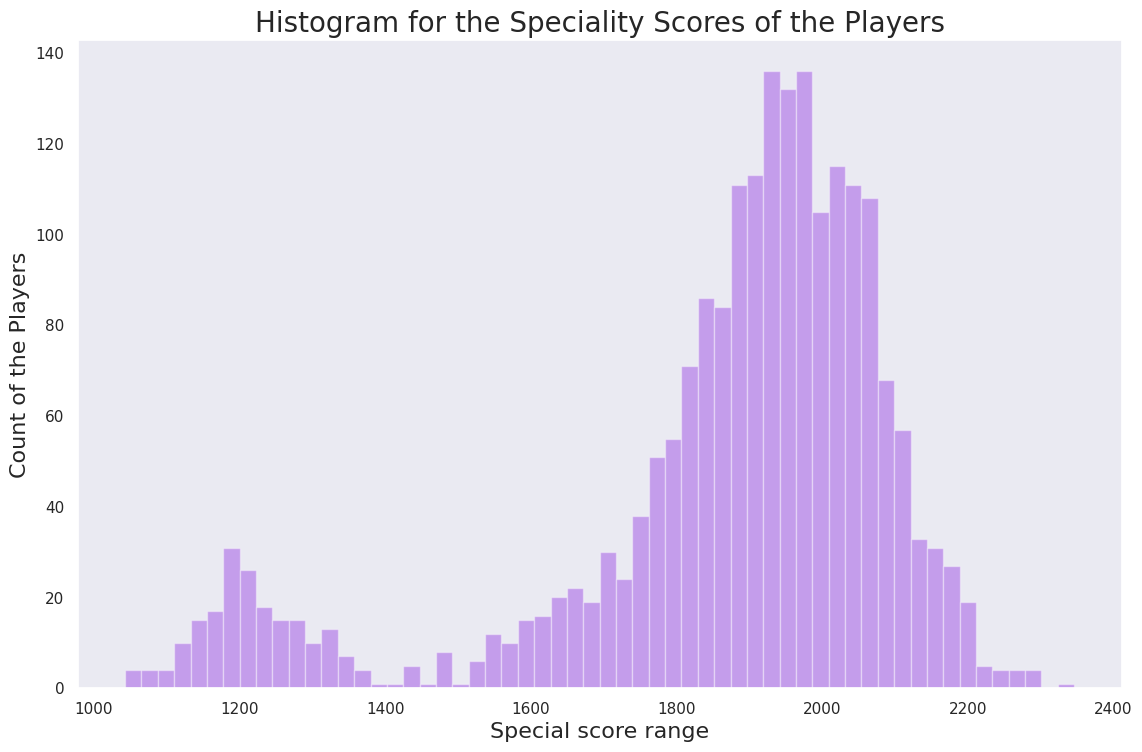

In [ ]:
# To show Different Speciality Score of the players participating in the FIFA 2019

x = data.Special
plt.figure(figsize = (12, 8))
ax = sns.distplot(x, bins = 58, kde = False, color = 'm')
ax.set_xlabel(xlabel = 'Special score range', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of the Players',fontsize = 16)
ax.set_title(label = 'Histogram for the Speciality Scores of the Players', fontsize = 20)
plt.show()

<ipython-input-38-662c52b082fa>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, bins = 58, kde = False, color = 'y')


Text(0.5, 1.0, 'Histogram of # To show Different overall scores of the players participating in the FIFA 2019')

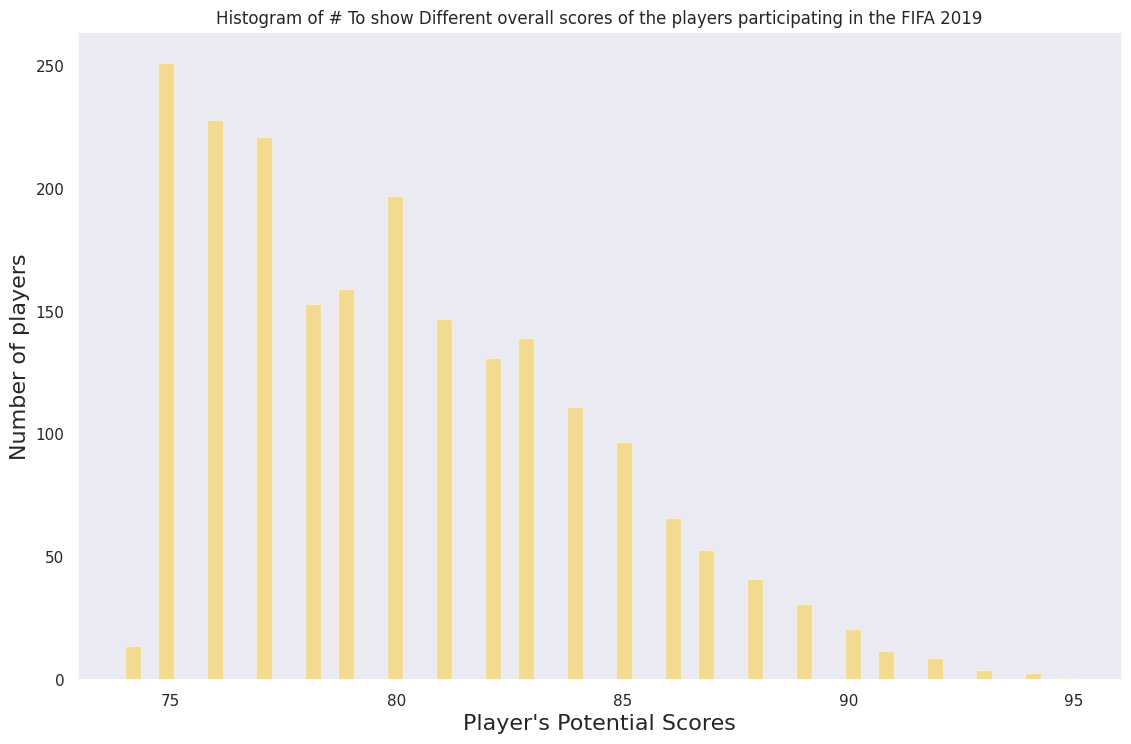

In [ ]:
# To show Different potential scores of the players participating in the FIFA 2019

x = data.Potential
plt.figure(figsize=(12,8))
ax = sns.distplot(x, bins = 58, kde = False, color = 'y')
ax.set_xlabel(xlabel = "Player\'s Potential Scores", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Histogram of # To show Different overall scores of the players participating in the FIFA 2019')


<ipython-input-39-74edffda29d1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, bins = 52, kde = False, color = 'r')


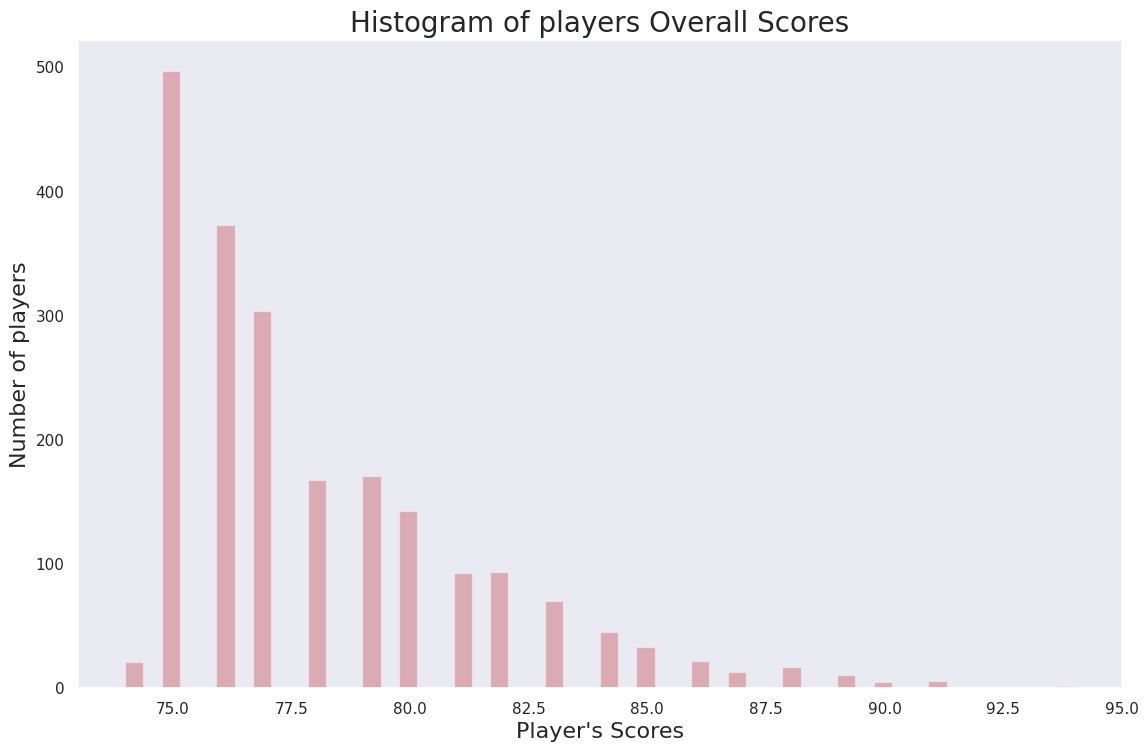

In [ ]:
sns.set(style = "dark", palette = "deep", color_codes = True)
x = data.Overall
plt.figure(figsize = (12,8))
ax = sns.distplot(x, bins = 52, kde = False, color = 'r')
ax.set_xlabel(xlabel = "Player\'s Scores", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Histogram of players Overall Scores', fontsize = 20)
plt.show()

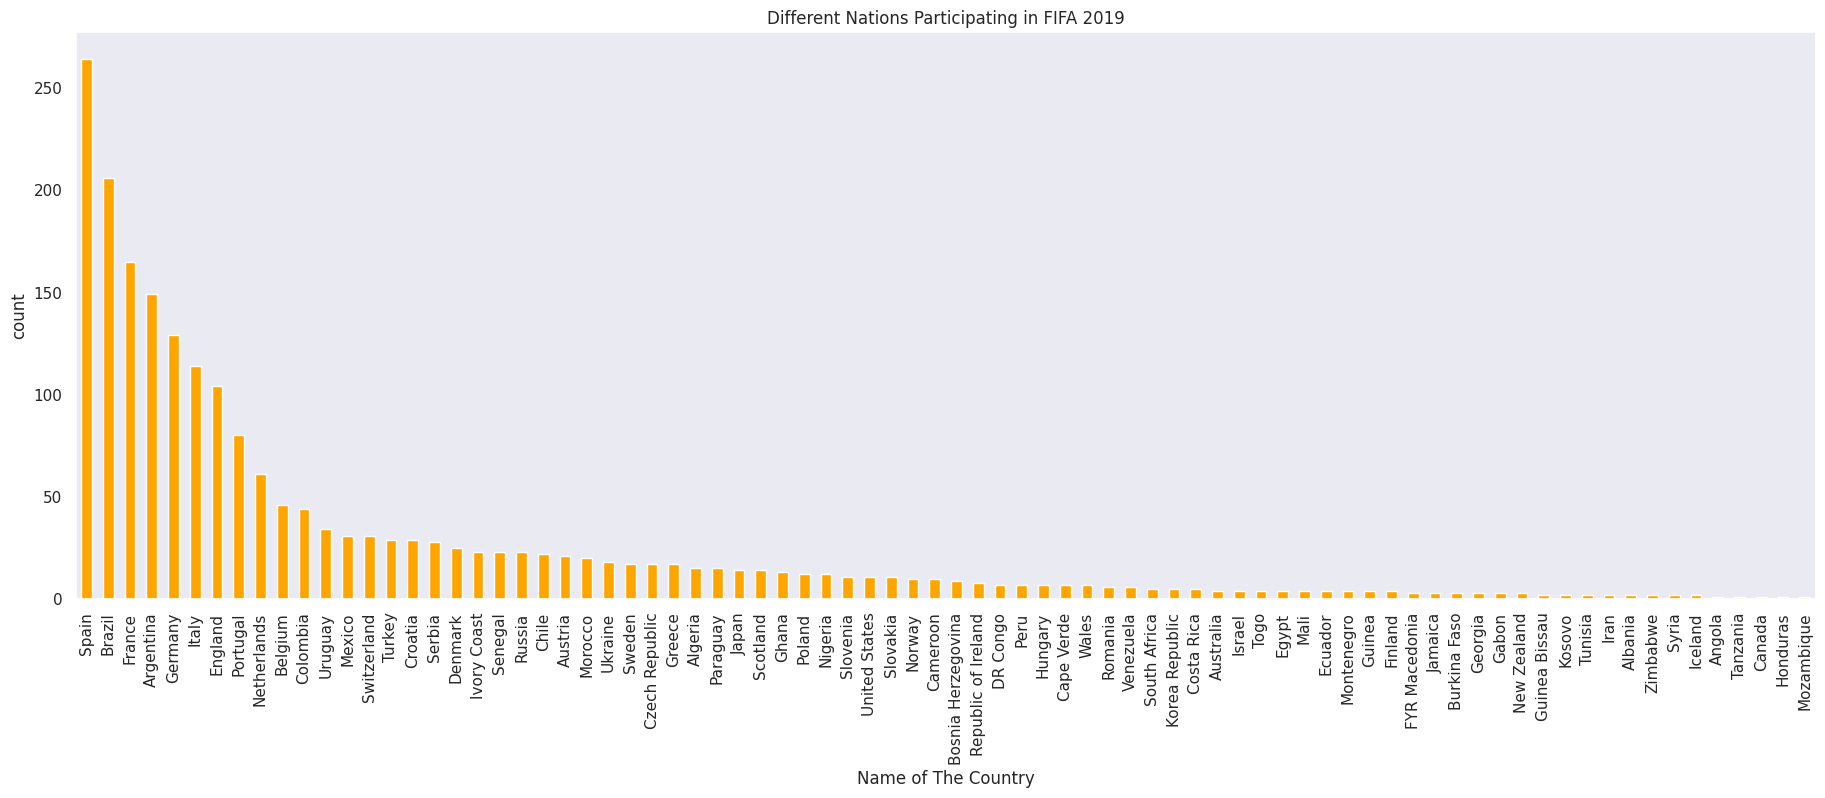

In [ ]:
# To show Different nations participating in the FIFA 2019

data['Nationality'].value_counts().head(80).plot.bar(color = 'orange', figsize = (20, 7))
plt.title('Different Nations Participating in FIFA 2019')
plt.xlabel('Name of The Country')
plt.ylabel('count')
plt.show()

<ipython-input-41-b938bee9bdbe>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, bins = 58, kde = False, color = 'g')


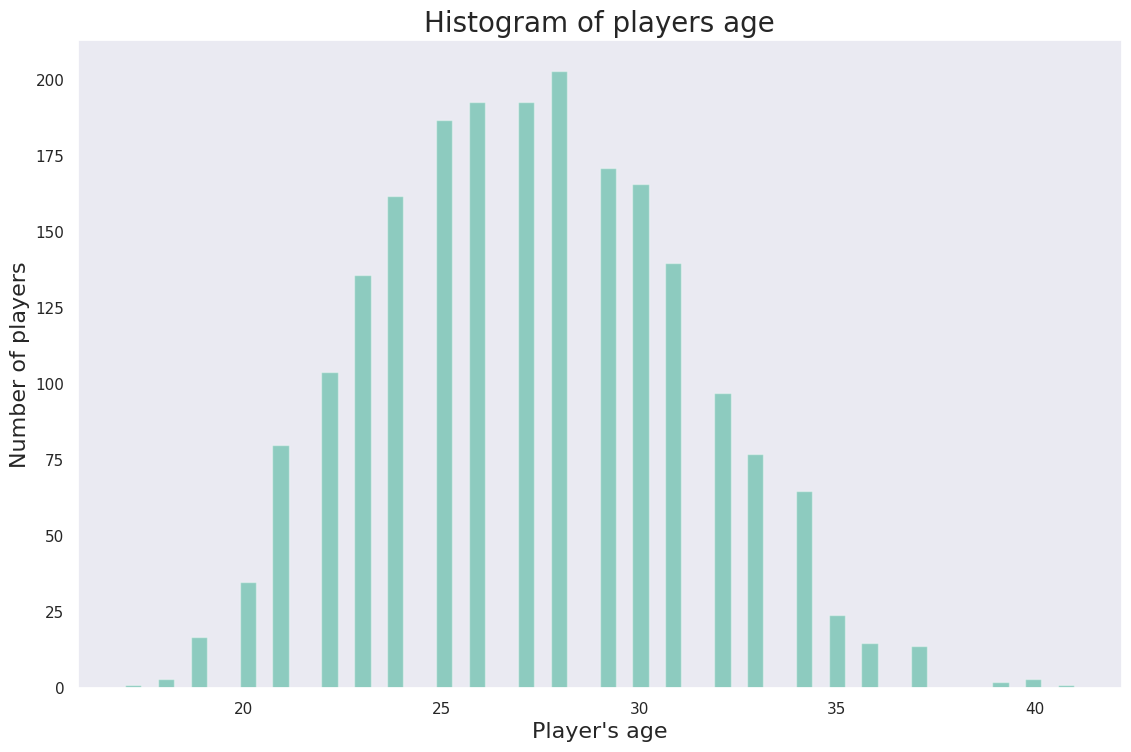

In [ ]:
# To show that there are people having same age
# Histogram: number of players's age

sns.set(style = "dark", palette = "colorblind", color_codes = True)
x = data.Age
plt.figure(figsize = (12,8))
ax = sns.distplot(x, bins = 58, kde = False, color = 'g')
ax.set_xlabel(xlabel = "Player\'s age", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Histogram of players age', fontsize = 20)
plt.show()

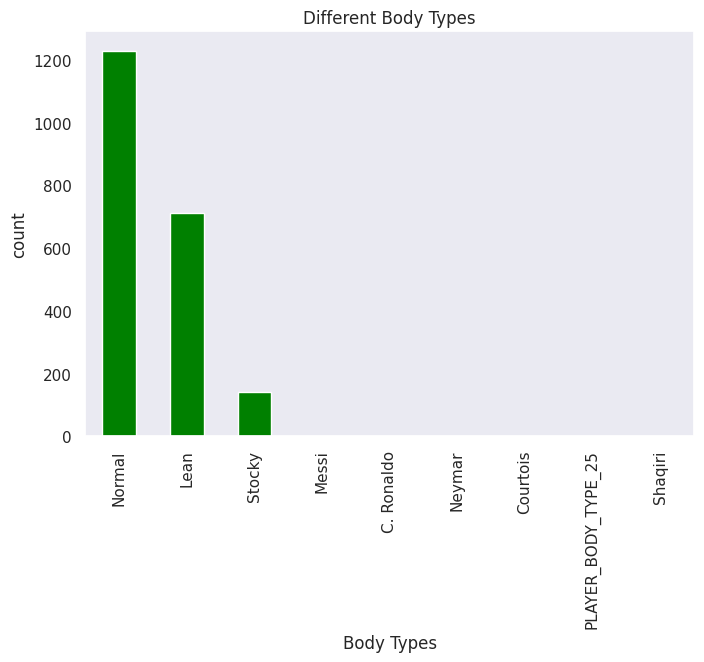

In [ ]:
#comparing the different body types of the players participating in FIFA 2019

data['Body Type'].value_counts().plot.bar(color = 'green', figsize = (7, 5))
plt.title('Different Body Types')
plt.xlabel('Body Types')
plt.ylabel('count')
plt.show()

In [ ]:
# selecting some of the interesting and important columns from the set of columns in the given dataset

selected_columns = ['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
                    'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot',
                    'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Height', 'Weight',
                    'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
                    'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
                    'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
                    'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                    'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
                    'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                    'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']

data_selected = pd.DataFrame(data, columns = selected_columns)
data_selected.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Special', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Height', 'Weight', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause'],
      dtype='object')

Text(0.5, 1.0, 'Comparison of Overall Scores and age wrt Preferred foot')

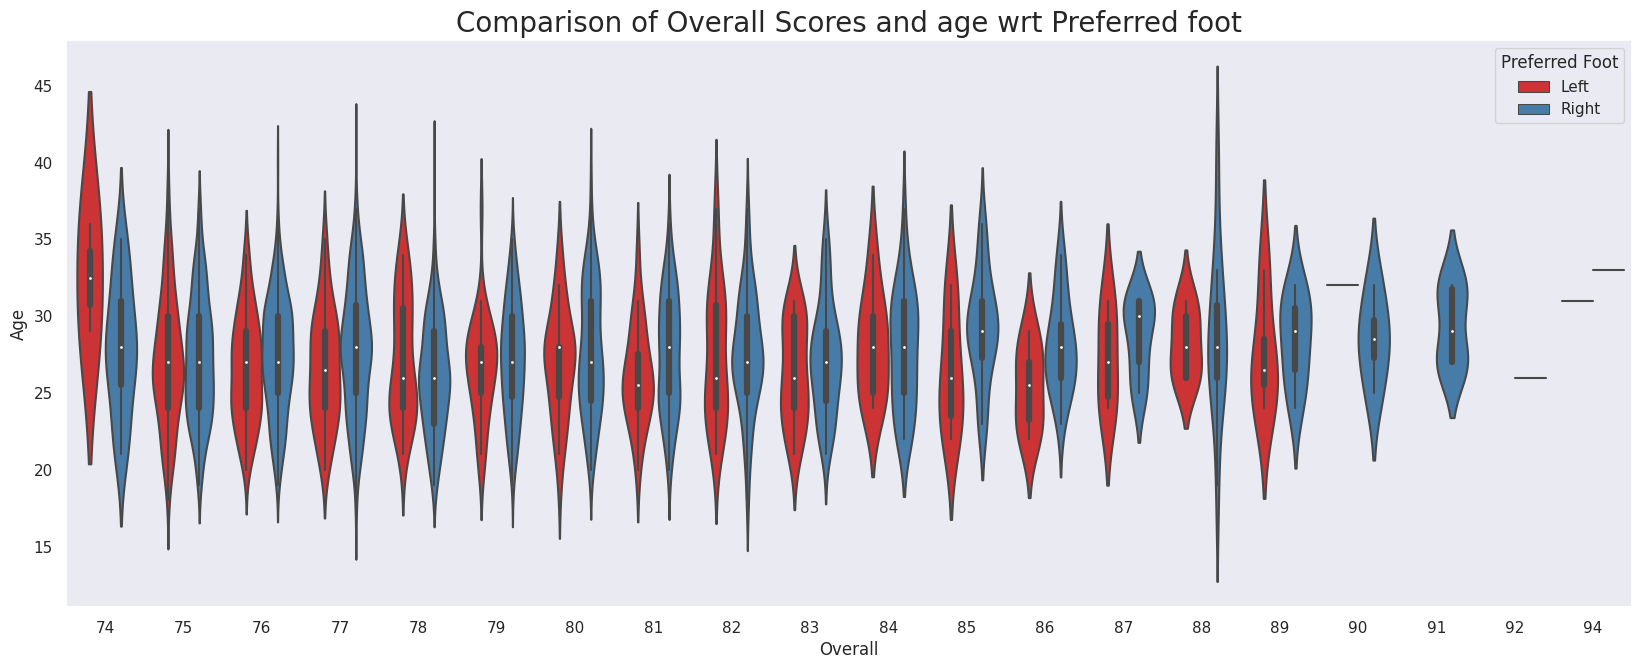

In [ ]:
# violin plot

plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(x=data['Overall'], y=data['Age'], hue = data['Preferred Foot'], palette = 'Set1')
plt.title('Comparison of Overall Scores and age wrt Preferred foot', fontsize = 20)

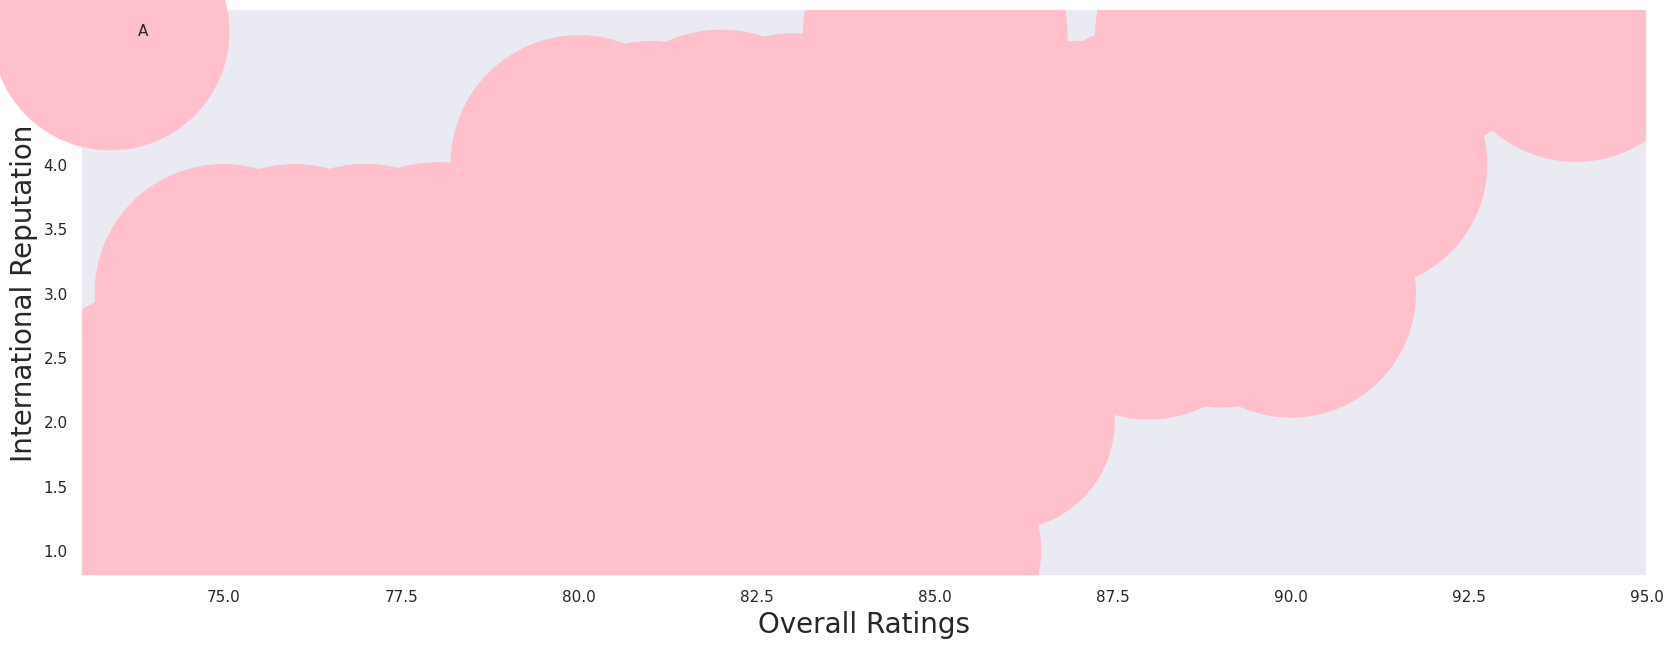

In [ ]:
# bubble plot

plt.scatter(data['Overall'], data['International Reputation'], s = data['Age']*1000, c = 'pink')
plt.xlabel('Overall Ratings', fontsize = 20)
plt.ylabel('International Reputation', fontsize = 20)
plt.legend('Age')
plt.show()

In [ ]:
data_selected.sample(5)

Name  Age  Nationality  Overall  Potential  \
1582       M. Zajc   24     Slovenia       75         82   
67          Thiago   27        Spain       86         86   
546    Jesús Navas   32        Spain       80         80   
213   Rui Patrício   30     Portugal       83         83   
1368      L. Zuffi   28  Switzerland       76         77   

                         Club       Value      Wage  Special Preferred Foot  \
1582                   Empoli   9500000.0   13000.0     1921          Right   
67          FC Bayern München  45500000.0  130000.0     2190          Right   
546                Sevilla FC  11500000.0   22000.0     2048          Right   
213   Wolverhampton Wanderers  16500000.0   74000.0     1352           Left   
1368            FC Basel 1893   7000000.0   25000.0     2097           Left   

      ...  Composure  Marking  StandingTackle SlidingTackle GKDiving  \
1582  ...       74.0     55.0            55.0          53.0     14.0   
67    ...       85.0     67.0            63.0          65.0      6.0   
546   ...       70.0     62.0            61.0          62.0     10.0   
213   ...       66.0     14.0            13.0          11.0     85.0   
1368  ...       69.0     77.0            72.0          70.0      7.0   

     GKHandling GKKicking  GKPositioning  GKReflexes  Release Clause  
1582        6.0      13.0           11.0         5.0            €19M  
67         11.0       7.0            9.0        13.0          €75.1M  
546        10.0      15.0            7.0        13.0          €24.2M  
213        81.0      80.0           79.0        82.0          €31.4M  
1368       13.0      15.0           16.0         7.0            €11M  

[5 rows x 52 columns]

<ipython-input-47-d3410319d498>:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']].corr(), annot = True)


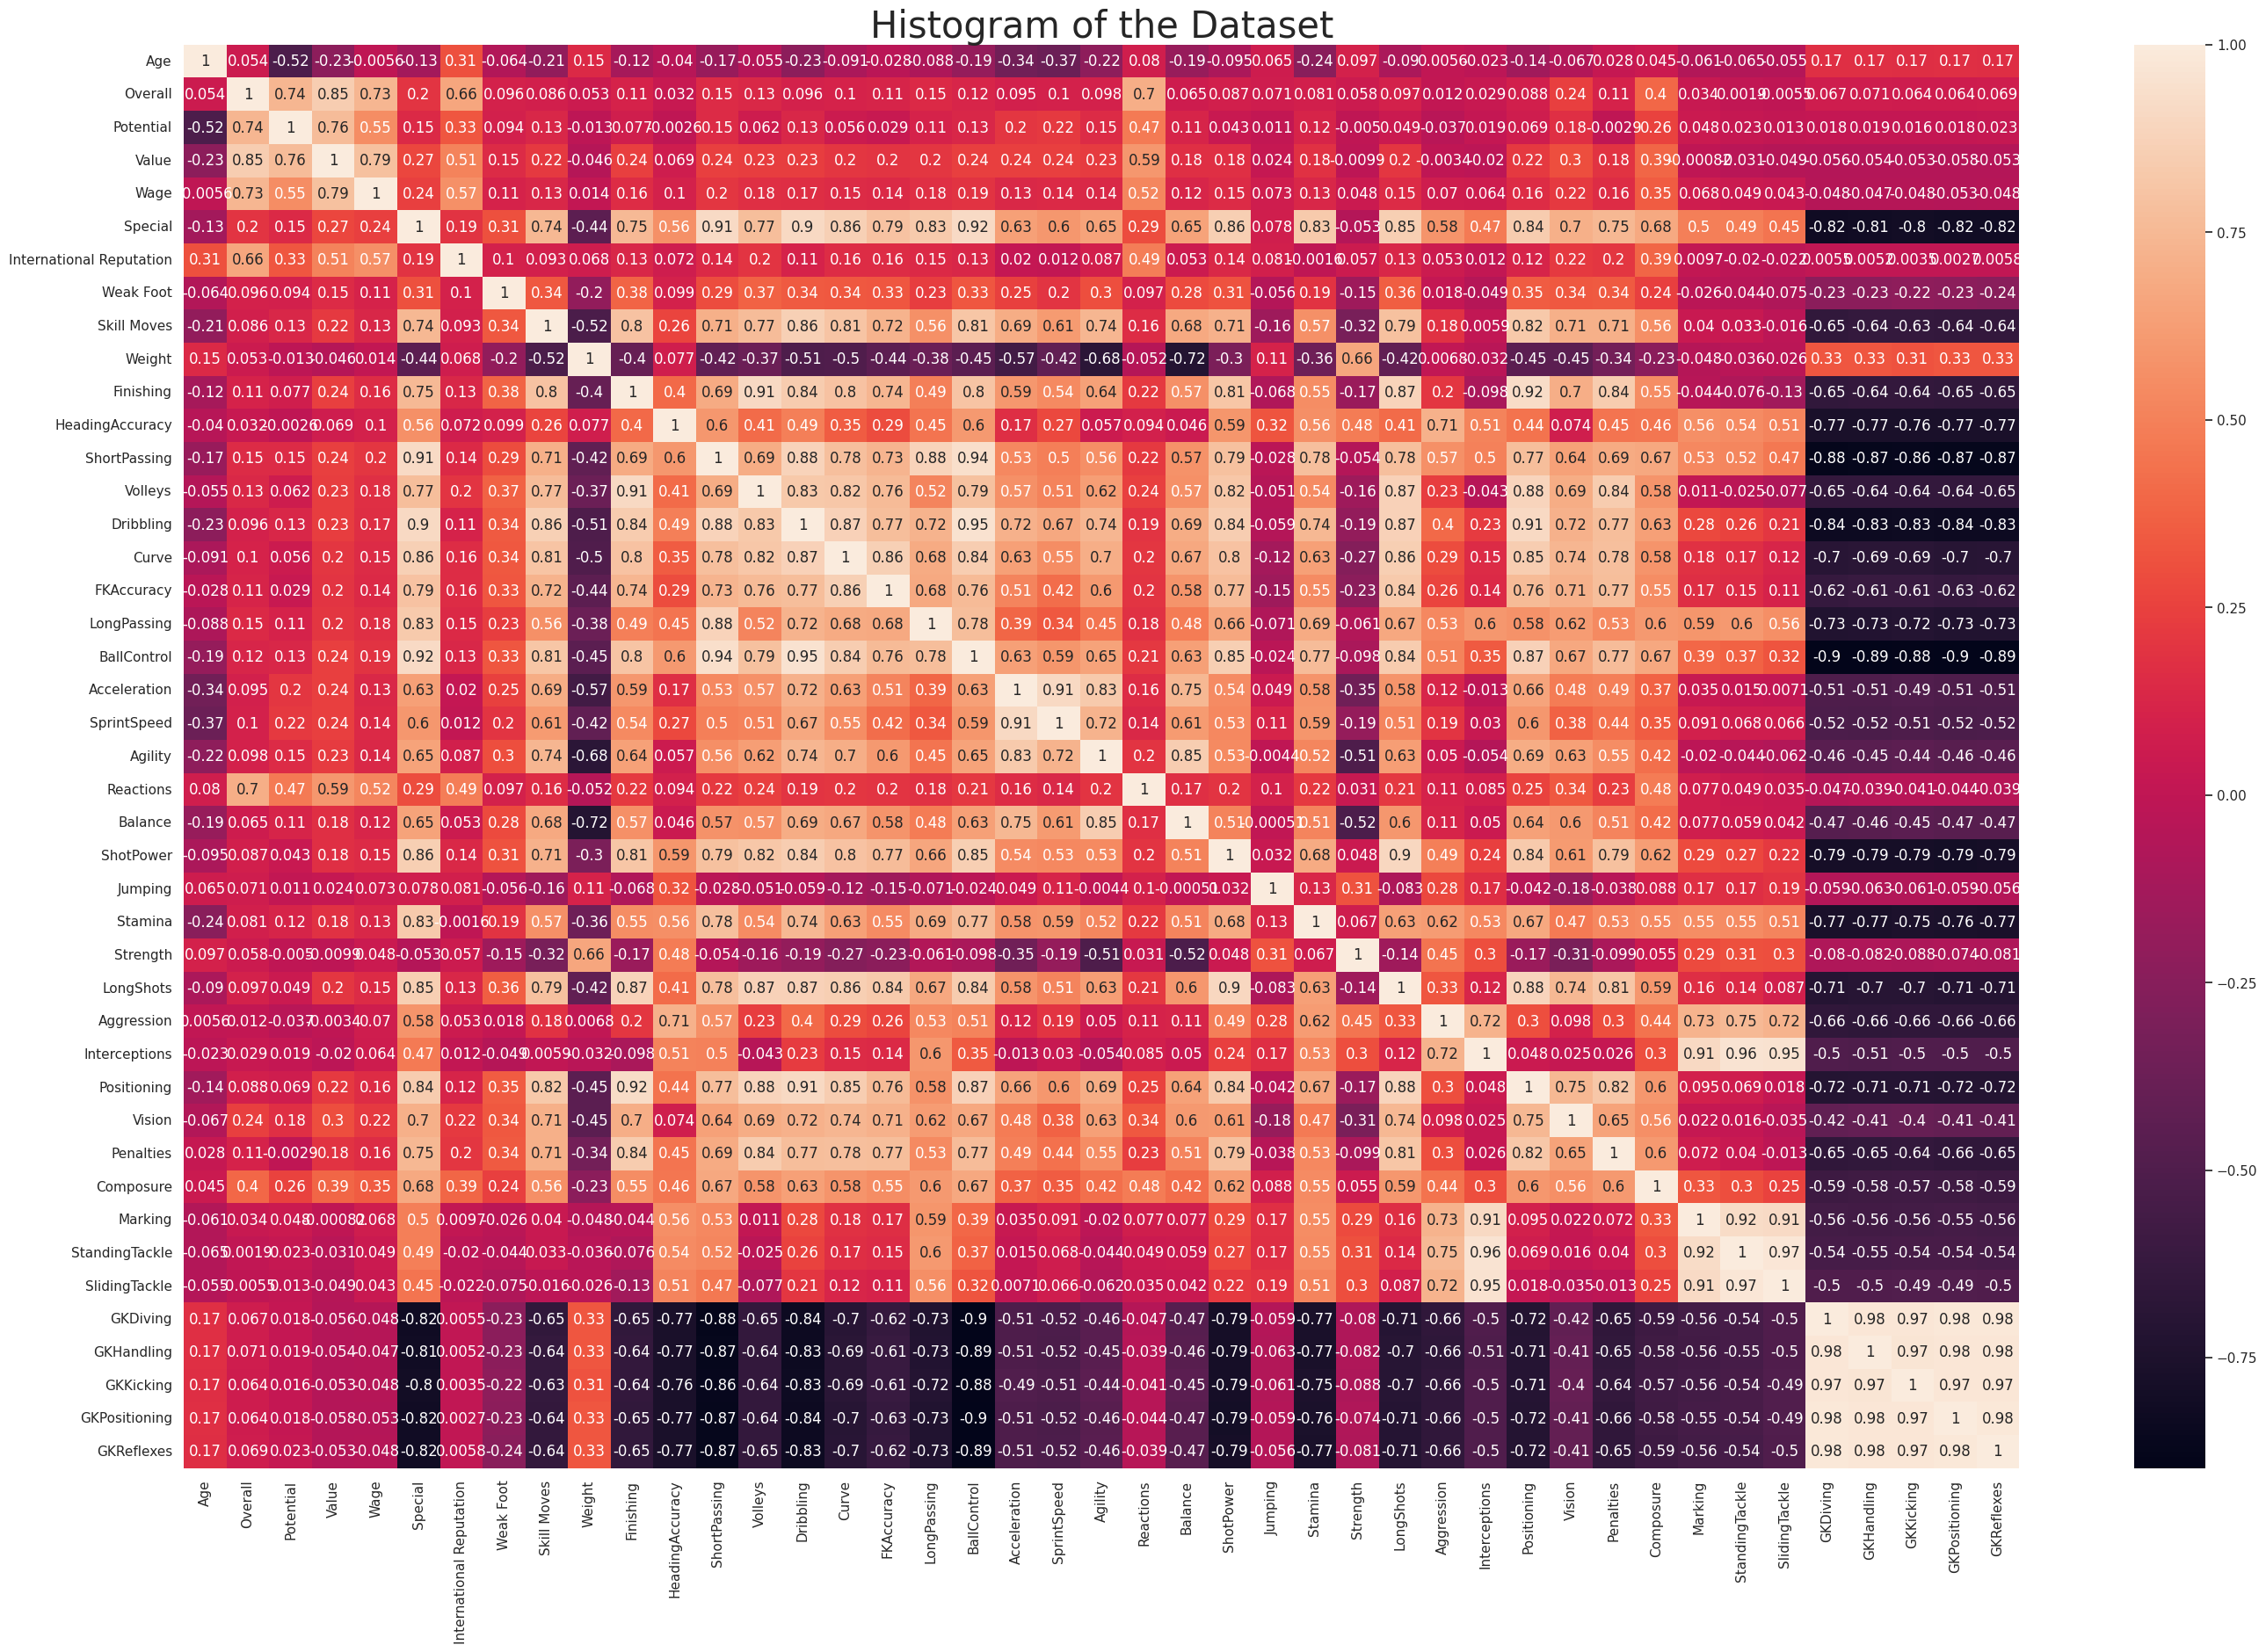

In [ ]:
# plotting a correlation heatmap

plt.rcParams['figure.figsize'] = (30, 20)
sns.heatmap(data_selected[['Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
                    'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot',
                    'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Height', 'Weight',
                    'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
                    'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
                    'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
                    'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                    'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
                    'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                    'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']].corr(), annot = True)

plt.title('Histogram of the Dataset', fontsize = 30)
plt.show()

In [ ]:
# best players per each position with their age, club, and nationality based on their overall scores

data.iloc[data.groupby(data['Position'])['Overall'].idxmax()][['Position', 'Name', 'Age', 'Club', 'Nationality']]

Position               Name  Age                      Club Nationality
17       CAM       A. Griezmann   27           Atlético Madrid      France
12        CB           D. Godín   32           Atlético Madrid     Uruguay
20       CDM    Sergio Busquets   29              FC Barcelona       Spain
271       CF       Luis Alberto   25                     Lazio       Spain
67        CM             Thiago   27         FC Bayern München       Spain
3         GK             De Gea   27         Manchester United       Spain
28       LAM       J. Rodríguez   26         FC Bayern München    Colombia
35        LB            Marcelo   30               Real Madrid      Brazil
24       LCB       G. Chiellini   33                  Juventus       Italy
11       LCM           T. Kroos   28               Real Madrid     Germany
14       LDM           N. Kanté   27                   Chelsea      France
5         LF          E. Hazard   27                   Chelsea     Belgium
33        LM      P. Aubameyang   29                   Arsenal       Gabon
21        LS          E. Cavani   31       Paris Saint-Germain     Uruguay
2         LW          Neymar Jr   26       Paris Saint-Germain      Brazil
474      LWB          N. Schulz   25       TSG 1899 Hoffenheim     Germany
129      RAM        J. Cuadrado   30                  Juventus    Colombia
69        RB        Azpilicueta   28                   Chelsea       Spain
8        RCB       Sergio Ramos   32               Real Madrid       Spain
4        RCM       K. De Bruyne   27           Manchester City     Belgium
45       RDM           P. Pogba   25         Manchester United      France
0         RF           L. Messi   31              FC Barcelona   Argentina
25        RM          K. Mbappé   19       Paris Saint-Germain      France
7         RS          L. Suárez   31              FC Barcelona     Uruguay
56        RW     Bernardo Silva   23           Manchester City    Portugal
450      RWB          M. Ginter   24  Borussia Mönchengladbach     Germany
1         ST  Cristiano Ronaldo   33                  Juventus    Portugal

In [ ]:
# best players from each positions with their age, nationality, club based on their potential scores

data.iloc[data.groupby(data['Position'])['Potential'].idxmax()][['Position', 'Name', 'Age', 'Club', 'Nationality']]

Position                 Name  Age                     Club Nationality
31       CAM           C. Eriksen   26        Tottenham Hotspur     Denmark
42        CB            S. Umtiti   24             FC Barcelona      France
27       CDM             Casemiro   26              Real Madrid      Brazil
350       CF             A. Milik   24                   Napoli      Poland
78        CM  S. Milinković-Savić   23                    Lazio      Serbia
3         GK               De Gea   27        Manchester United       Spain
28       LAM         J. Rodríguez   26        FC Bayern München    Colombia
35        LB              Marcelo   30              Real Madrid      Brazil
77       LCB          M. Škriniar   23                    Inter    Slovakia
11       LCM             T. Kroos   28              Real Madrid     Germany
14       LDM             N. Kanté   27                  Chelsea      France
15        LF            P. Dybala   24                 Juventus   Argentina
415       LM             H. Aouar   20       Olympique Lyonnais      France
21        LS            E. Cavani   31      Paris Saint-Germain     Uruguay
2         LW            Neymar Jr   26      Paris Saint-Germain      Brazil
601      LWB                Jonny   24  Wolverhampton Wanderers       Spain
171      RAM            H. Ziyech   25                     Ajax     Morocco
247       RB         João Cancelo   24                 Juventus    Portugal
8        RCB         Sergio Ramos   32              Real Madrid       Spain
4        RCM         K. De Bruyne   27          Manchester City     Belgium
45       RDM             P. Pogba   25        Manchester United      France
0         RF             L. Messi   31             FC Barcelona   Argentina
25        RM            K. Mbappé   19      Paris Saint-Germain      France
7         RS            L. Suárez   31             FC Barcelona     Uruguay
79        RW        Marco Asensio   22              Real Madrid       Spain
766      RWB         Pablo Maffeo   20            VfB Stuttgart       Spain
1         ST    Cristiano Ronaldo   33                 Juventus    Portugal

In [ ]:
# picking up the countries with highest number of players to compare their overall scores

data['Nationality'].value_counts().head(8)

Spain        264
Brazil       206
France       165
Argentina    149
Germany      129
Italy        114
England      104
Portugal      80
Name: Nationality, dtype: int64

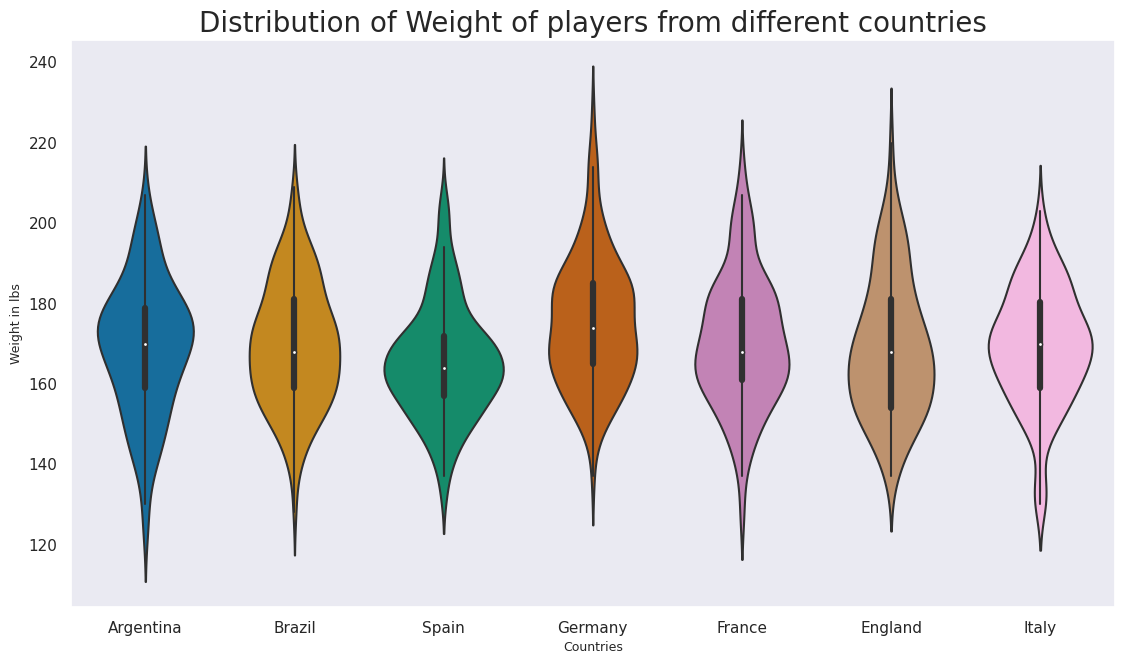

In [ ]:
# Every Nations' Player and their Weights

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Weight']]

plt.rcParams['figure.figsize'] = (12, 7)
ax = sns.violinplot(x = data_countries['Nationality'], y = data_countries['Weight'], palette = 'colorblind')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Weight in lbs', fontsize = 9)
ax.set_title(label = 'Distribution of Weight of players from different countries', fontsize = 20)
plt.show()

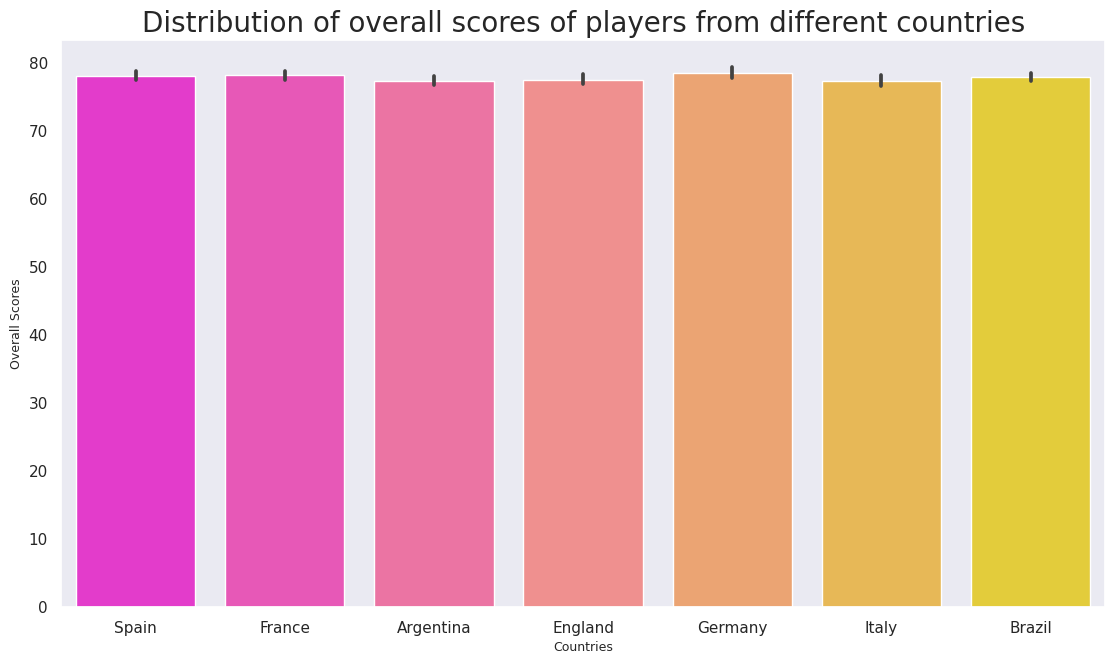

In [ ]:
# Every Nations' Player and their overall scores

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Overall']]

plt.rcParams['figure.figsize'] = (12, 7)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Overall'], palette = 'spring')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Scores', fontsize = 9)
ax.set_title(label = 'Distribution of overall scores of players from different countries', fontsize = 20)
plt.show()

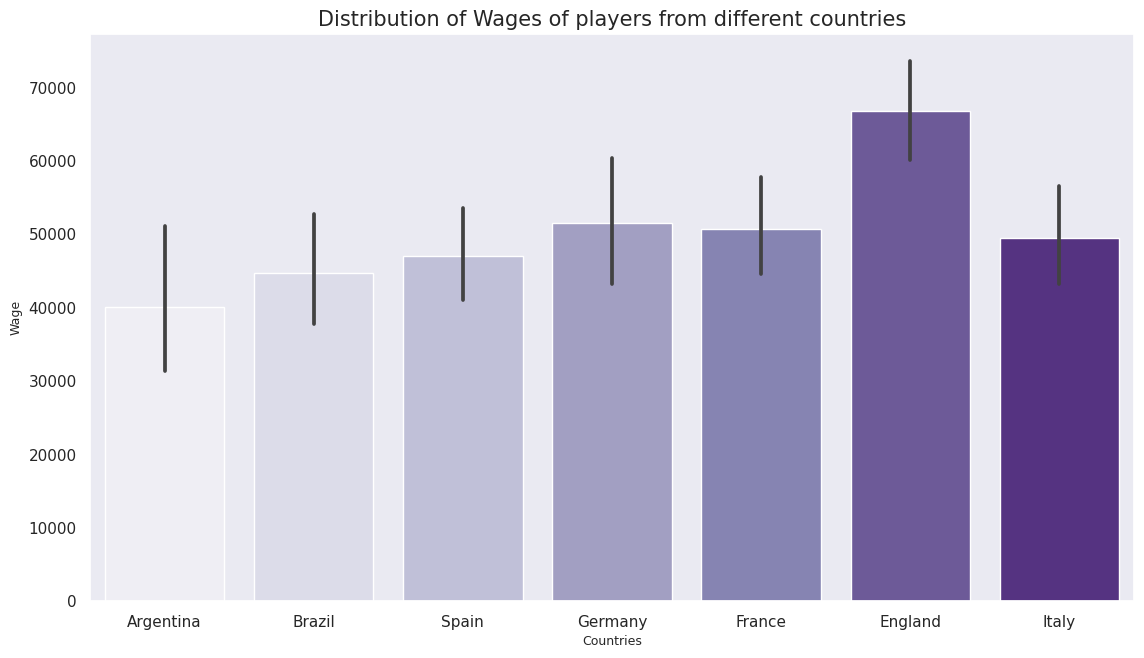

In [ ]:
# Every Nations' Player and their wages

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Wage']]

plt.rcParams['figure.figsize'] = (12, 7)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Wage'], palette = 'Purples')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Wage', fontsize = 9)
ax.set_title(label = 'Distribution of Wages of players from different countries', fontsize = 15)
plt.show()

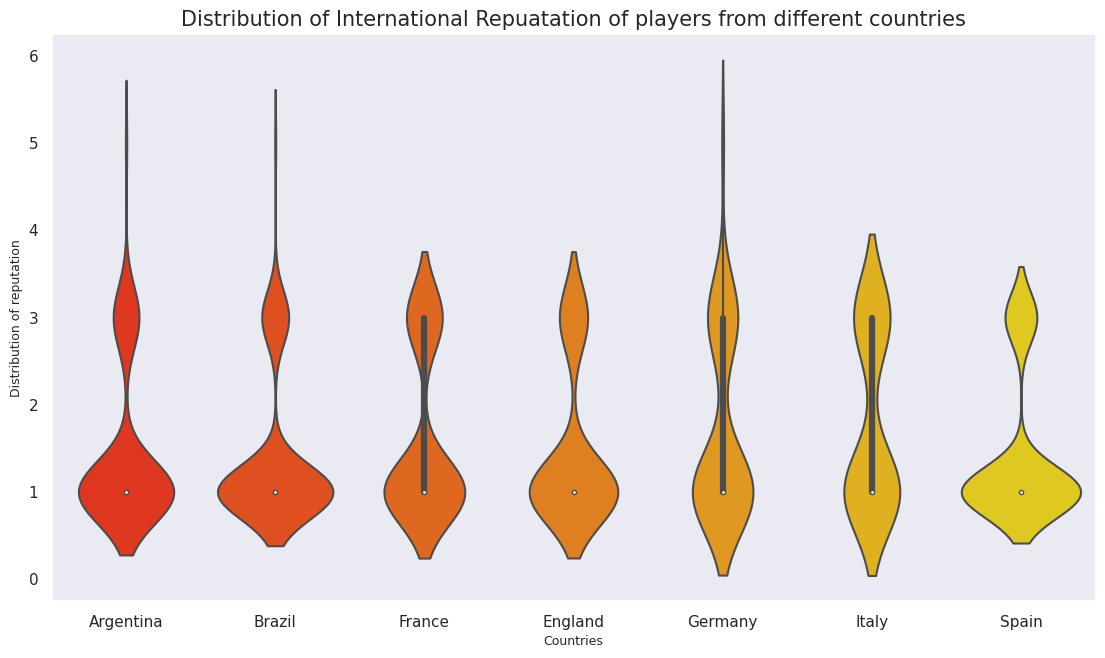

In [ ]:
# Every Nations' Player and their International Reputation

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['International Reputation']]

plt.rcParams['figure.figsize'] = (12, 7)
ax = sns.violinplot(x = data_countries['Nationality'], y = data_countries['International Reputation'], palette = 'autumn')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Distribution of reputation', fontsize = 9)
ax.set_title(label = 'Distribution of International Repuatation of players from different countries', fontsize = 15)
plt.show()

In [ ]:
# finding the the popular clubs around the globe

data['Club'].value_counts().head(10)

Chelsea              24
Manchester United    23
Tottenham Hotspur    23
Liverpool            23
Napoli               23
Borussia Dortmund    23
Lazio                22
SL Benfica           22
Juventus             22
Real Madrid          22
Name: Club, dtype: int64

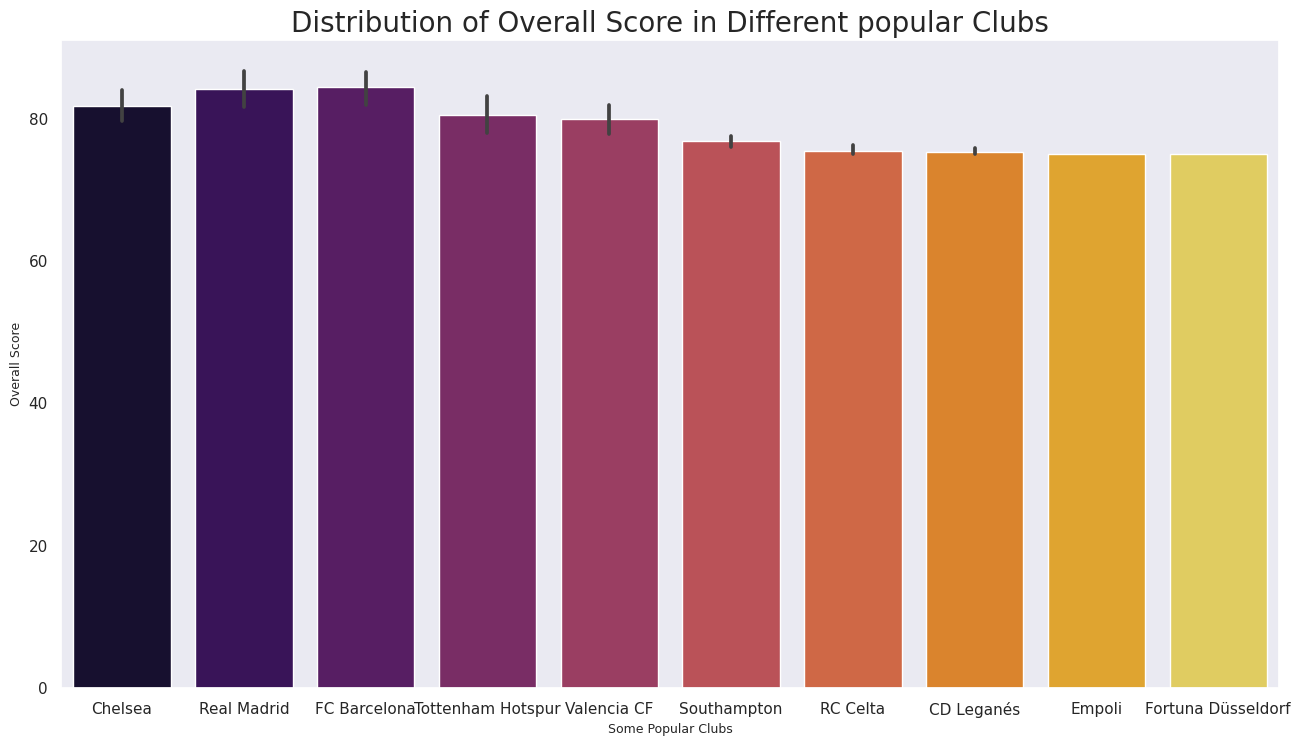

In [ ]:
some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_clubs = data.loc[data['Club'].isin(some_clubs) & data['Overall']]

plt.rcParams['figure.figsize'] = (14, 8)
ax = sns.barplot(x = data_clubs['Club'], y = data_clubs['Overall'], palette = 'inferno')
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 9)
ax.set_title(label = 'Distribution of Overall Score in Different popular Clubs', fontsize = 20)
plt.show()

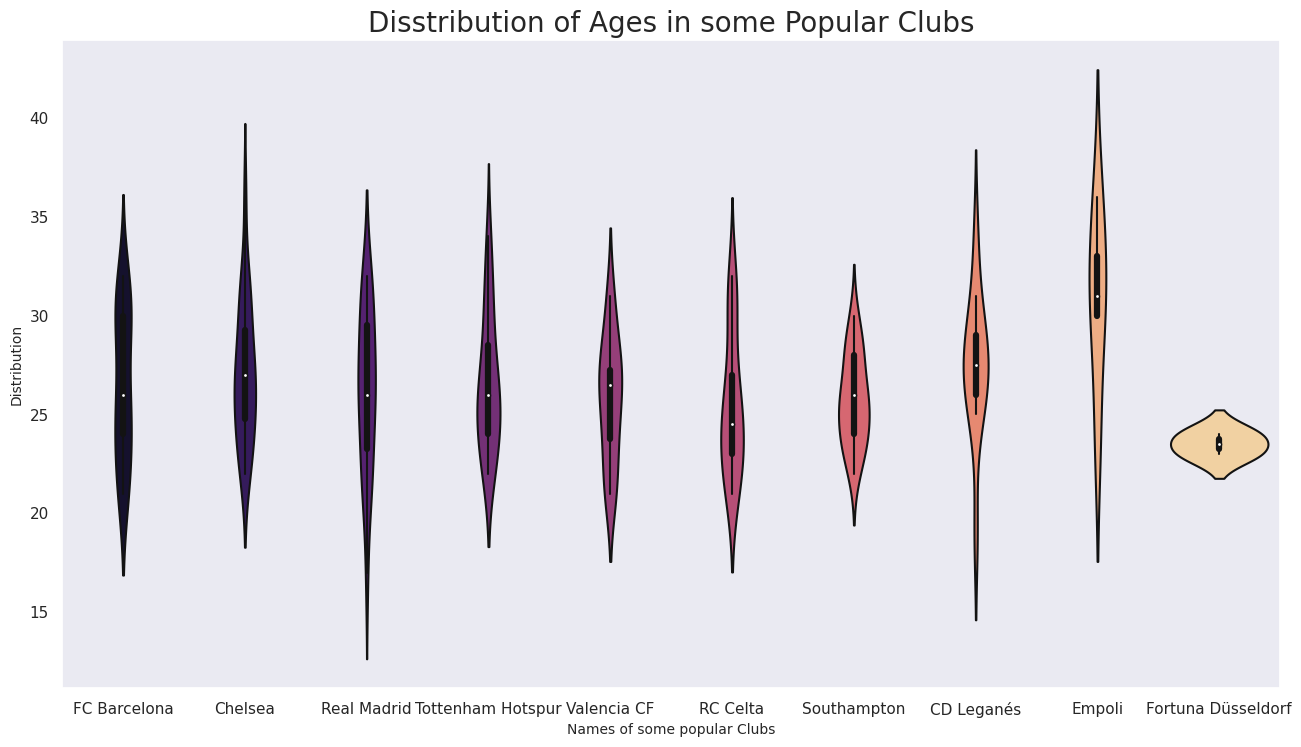

In [ ]:
# Distribution of Ages in some Popular clubs

some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_club = data.loc[data['Club'].isin(some_clubs) & data['Wage']]

plt.rcParams['figure.figsize'] = (14, 8)
ax = sns.violinplot(x ='Club', y ='Age', data = data_club, palette = 'magma')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution', fontsize = 10)
ax.set_title(label = 'Disstribution of Ages in some Popular Clubs', fontsize = 20)
plt.show()

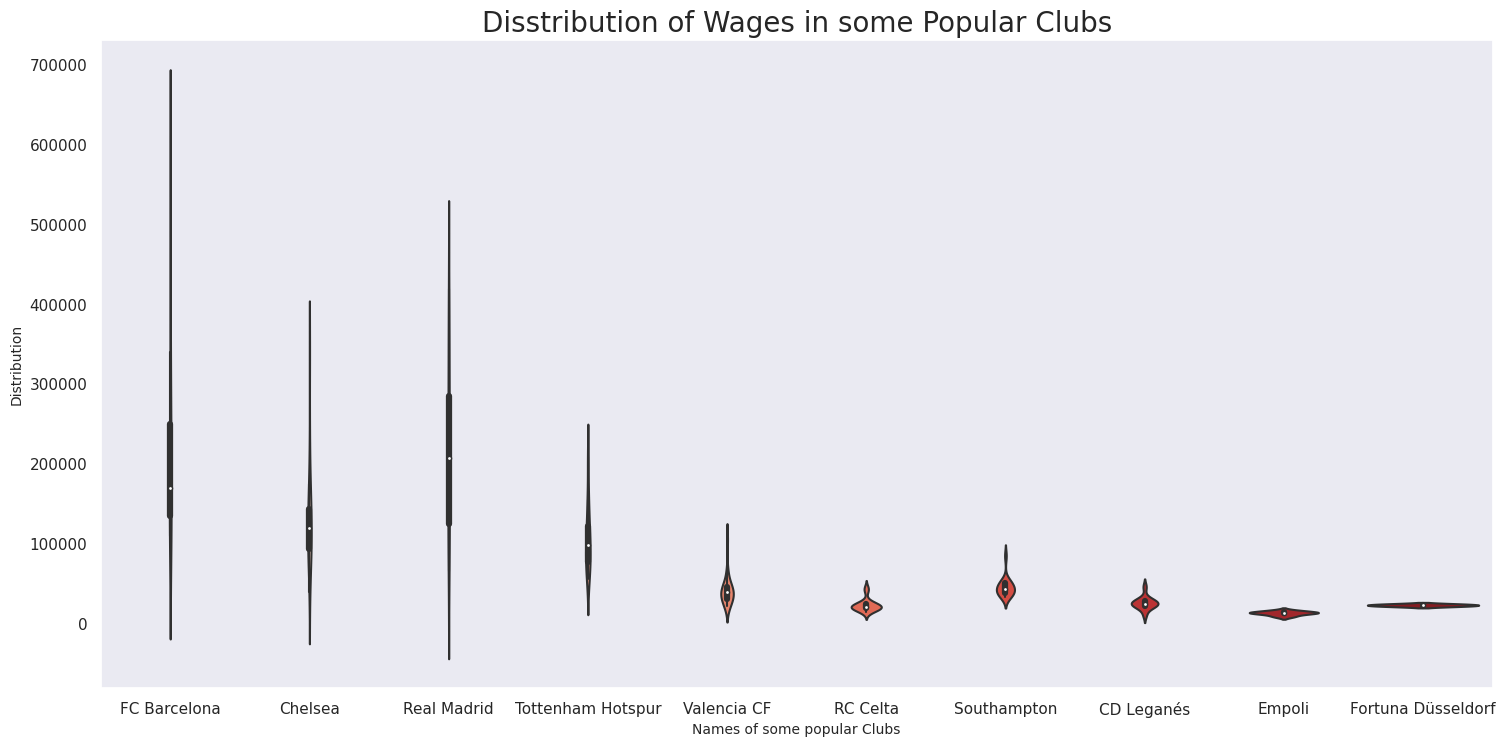

In [ ]:
# Distribution of Wages in some Popular clubs

some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_club = data.loc[data['Club'].isin(some_clubs) & data['Wage']]

plt.rcParams['figure.figsize'] = (16, 8)
ax = sns.violinplot(x = 'Club', y = 'Wage', data = data_club, palette = 'Reds')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution', fontsize = 10)
ax.set_title(label = 'Disstribution of Wages in some Popular Clubs', fontsize = 20)
plt.show()

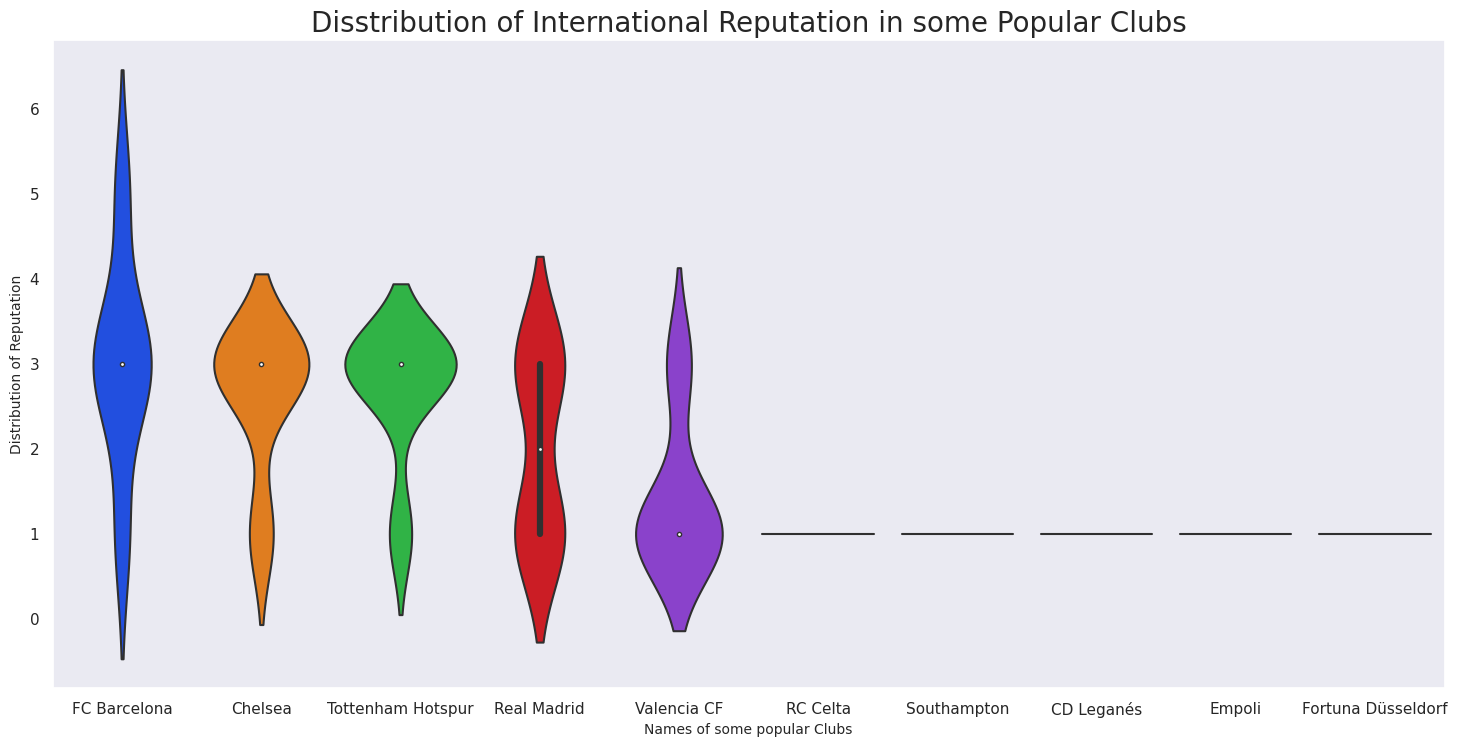

In [ ]:
# Distribution of Wages in some Popular clubs

some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_club = data.loc[data['Club'].isin(some_clubs) & data['International Reputation']]

plt.rcParams['figure.figsize'] = (16, 8)
ax = sns.violinplot(x = 'Club', y = 'International Reputation', data = data_club, palette = 'bright')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution of Reputation', fontsize = 10)
ax.set_title(label = 'Disstribution of International Reputation in some Popular Clubs', fontsize = 20)
plt.show()

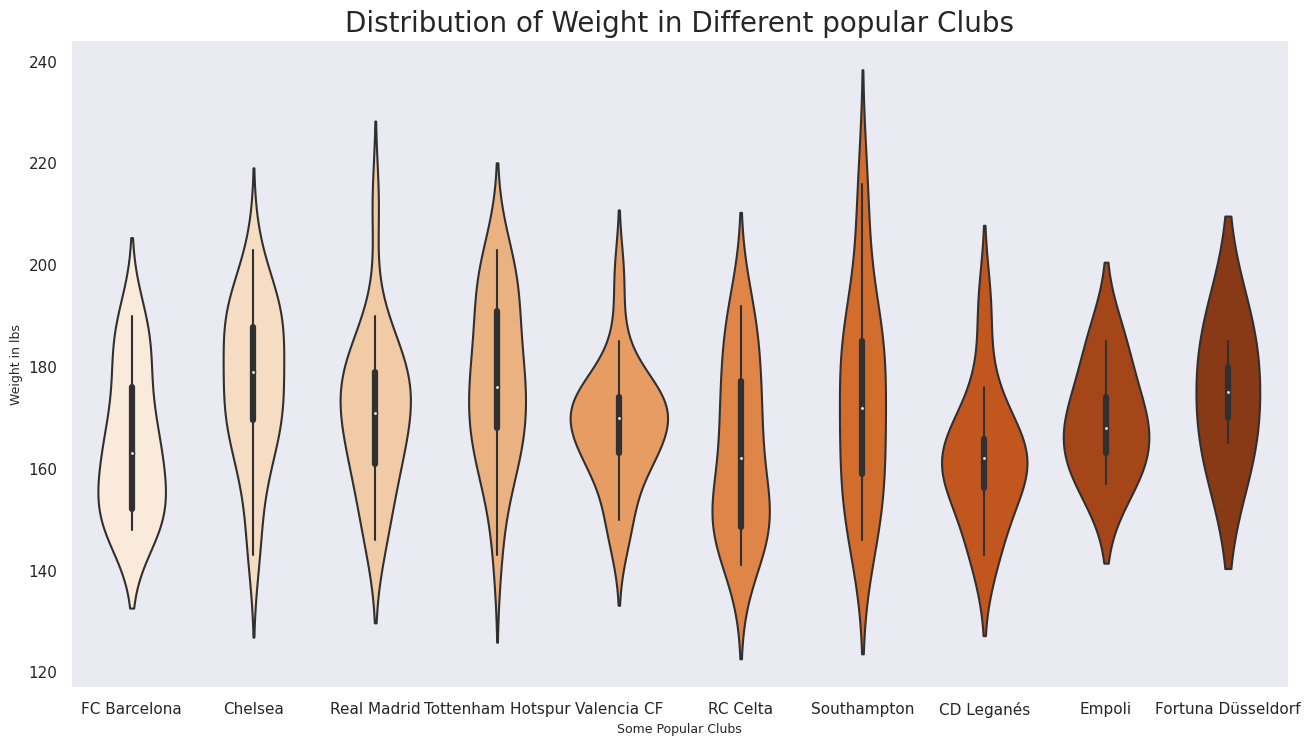

In [ ]:
some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_clubs = data.loc[data['Club'].isin(some_clubs) & data['Weight']]

plt.rcParams['figure.figsize'] = (14, 8)
ax = sns.violinplot(x = 'Club', y = 'Weight', data = data_clubs, palette = 'Oranges')
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Weight in lbs', fontsize = 9)
ax.set_title(label = 'Distribution of Weight in Different popular Clubs', fontsize = 20)
plt.show()

In [ ]:
# finding 15 youngest Players from the dataset

youngest = data.sort_values('Age', ascending = True)[['Name', 'Age', 'Club', 'Nationality']].head(15)
print(youngest)


                  Name  Age                      Club  Nationality
1143   Vinícius Júnior   17               Real Madrid       Brazil
226         M. de Ligt   18                      Ajax  Netherlands
1800      R. Sessegnon   18                    Fulham      England
1004         J. Sancho   18         Borussia Dortmund      England
413         K. Havertz   19       Bayer 04 Leverkusen      Germany
730          A. Hakimi   19         Borussia Dortmund      Morocco
1544          A. Lunin   19                CD Leganés      Ukraine
1956           M. Sarr   19                  OGC Nice       France
1312  Gedson Fernandes   19                SL Benfica     Portugal
2028         P. Retsos   19       Bayer 04 Leverkusen       Greece
1110      D. Upamecano   19                RB Leipzig       France
229      G. Donnarumma   19                     Milan        Italy
2029      J. Hernández   19                 SD Huesca     Colombia
1820       J. Kluivert   19                      Roma  Netherl

In [ ]:
# finding 15 eldest players from the dataset

eldest = data.sort_values('Age', ascending = False)[['Name', 'Age', 'Club', 'Nationality']].head(15)
print(eldest)

               Name  Age                     Club Nationality
1120      J. Villar   41                  No Club    Paraguay
41        G. Buffon   40      Paris Saint-Germain       Italy
1294    A. Bizzarri   40                   Foggia   Argentina
864          Hilton   40          Montpellier HSC      Brazil
1952     P. Guiñazú   39   Club Atlético Talleres   Argentina
554   S. Sorrentino   39            Chievo Verona       Italy
1788       A. Pérez   37           Deportivo Cali    Colombia
1720        Iraizoz   37                Girona FC       Spain
992         J. Sand   37           Deportivo Cali   Argentina
2026     E. Paredes   37                Colo-Colo       Chile
1848         Cássio   37               Al Taawoun      Brazil
725    E. Belözoğlu   37    Medipol Başakşehir FK      Turkey
1625      D. Bonera   37            Villarreal CF       Italy
1863     E. Moretti   37                   Torino       Italy
316          Aduriz   37  Athletic Club de Bilbao       Spain


In [ ]:
# checking the head of the joined column

data['Joined'].head()

0     Jul 1, 2004
1    Jul 10, 2018
2     Aug 3, 2017
3     Jul 1, 2011
4    Aug 30, 2015
Name: Joined, dtype: object

In [ ]:
# The longest membership in the club

import datetime

now = datetime.datetime.now()
data['Join_year'] = data.Joined.dropna().map(lambda x: x.split(',')[1].split(' ')[1])
data['Years_of_member'] = (data.Join_year.dropna().map(lambda x: now.year - int(x))).astype('int')
membership = data[['Name', 'Club', 'Years_of_member']].sort_values(by = 'Years_of_member', ascending = False).head(10)
membership.set_index('Name', inplace=True)
membership

Club  Years_of_member
Name                                            
D. De Rossi                Roma               21
I. Akinfeev     PFC CSKA Moscow               21
L. Perrin      AS Saint-Étienne               20
L. Messi           FC Barcelona               19
M. Noble        West Ham United               19
Bruno             Villarreal CF               18
F. Magnanelli          Sassuolo               18
G. Chiellini           Juventus               18
Sergio Ramos        Real Madrid               18
Javi López         RCD Espanyol               17

In [ ]:
# defining the features of players

player_features = ('Acceleration', 'Aggression', 'Agility',
                   'Balance', 'BallControl', 'Composure',
                   'Crossing', 'Dribbling', 'FKAccuracy',
                   'Finishing', 'GKDiving', 'GKHandling',
                   'GKKicking', 'GKPositioning', 'GKReflexes',
                   'HeadingAccuracy', 'Interceptions', 'Jumping',
                   'LongPassing', 'LongShots', 'Marking', 'Penalties')

# Top four features for every position in football

for i, val in data.groupby(data['Position'])[player_features].mean().iterrows():
    print('Position {}: {}, {}, {}'.format(i, *tuple(val.nlargest(4).index)))

Position CAM: BallControl, Dribbling, Agility
Position CB: Interceptions, Aggression, HeadingAccuracy
Position CDM: Aggression, Interceptions, Composure
Position CF: BallControl, Dribbling, Agility
Position CM: BallControl, LongPassing, Dribbling
Position GK: GKReflexes, GKDiving, GKPositioning
Position LAM: BallControl, Crossing, Agility
Position LB: Crossing, Acceleration, BallControl
Position LCB: Aggression, Marking, Interceptions
Position LCM: BallControl, LongPassing, Composure
Position LDM: BallControl, LongPassing, Composure
Position LF: Agility, BallControl, Dribbling
Position LM: Acceleration, Agility, Dribbling
Position LS: Finishing, BallControl, Composure
Position LW: Acceleration, Dribbling, Agility
Position LWB: Crossing, Acceleration, BallControl
Position RAM: Agility, Dribbling, BallControl
Position RB: Acceleration, Crossing, Interceptions
Position RCB: Aggression, Marking, Interceptions
Position RCM: BallControl, LongPassing, Dribbling
Position RDM: Aggression, Inter

<ipython-input-67-9f5f548e667e>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  for i, val in data.groupby(data['Position'])[player_features].mean().iterrows():


<ipython-input-68-ac97cdf4ee2a>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  for position_name, features in data.groupby(data['Position'])[player_features].mean().iterrows():


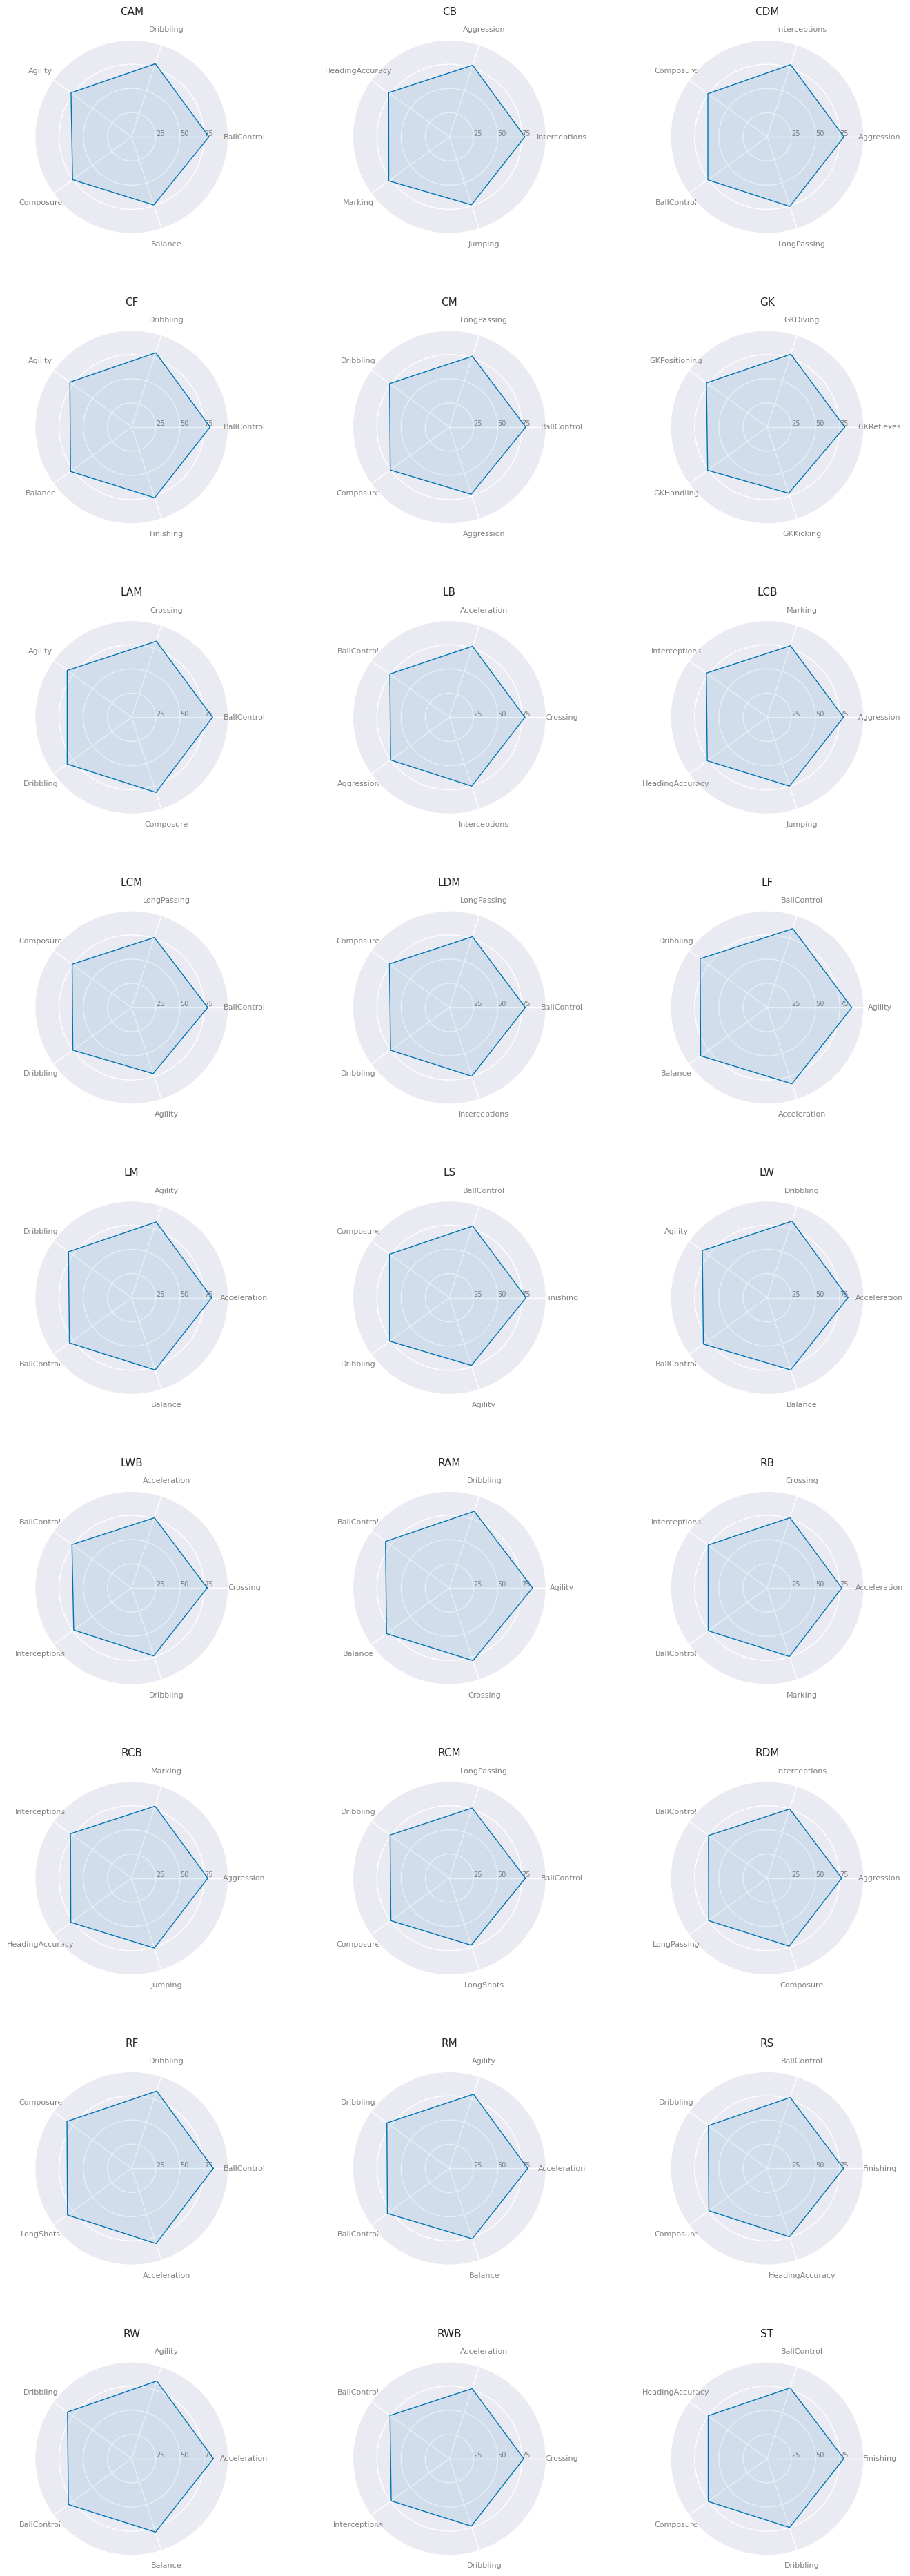

In [ ]:
from math import pi

idx = 1
plt.figure(figsize=(15,45))
for position_name, features in data.groupby(data['Position'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(5))

    # number of variable
    categories=top_features.keys()
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = list(top_features.values())
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(9, 3, idx, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
    plt.ylim(0,100)

    plt.subplots_adjust(hspace = 0.5)

    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

    plt.title(position_name, size=11, y=1.1)

    idx += 1

In [ ]:
# Top 10 left footed footballers

data[data['Preferred Foot'] == 'Left'][['Name', 'Age', 'Club', 'Nationality']].head(10)

Name  Age               Club Nationality
0       L. Messi   31       FC Barcelona   Argentina
13   David Silva   32    Manchester City       Spain
15     P. Dybala   24           Juventus   Argentina
17  A. Griezmann   27    Atlético Madrid      France
19   T. Courtois   26        Real Madrid     Belgium
24  G. Chiellini   33           Juventus       Italy
26      M. Salah   26          Liverpool       Egypt
28  J. Rodríguez   26  FC Bayern München    Colombia
35       Marcelo   30        Real Madrid      Brazil
36       G. Bale   28        Real Madrid       Wales

In [ ]:
# Top 10 Right footed footballers

data[data['Preferred Foot'] == 'Right'][['Name', 'Age', 'Club', 'Nationality']].head(10)

Name  Age                 Club Nationality
1   Cristiano Ronaldo   33             Juventus    Portugal
2           Neymar Jr   26  Paris Saint-Germain      Brazil
3              De Gea   27    Manchester United       Spain
4        K. De Bruyne   27      Manchester City     Belgium
5           E. Hazard   27              Chelsea     Belgium
6           L. Modrić   32          Real Madrid     Croatia
7           L. Suárez   31         FC Barcelona     Uruguay
8        Sergio Ramos   32          Real Madrid       Spain
9            J. Oblak   25      Atlético Madrid    Slovenia
10     R. Lewandowski   29    FC Bayern München      Poland

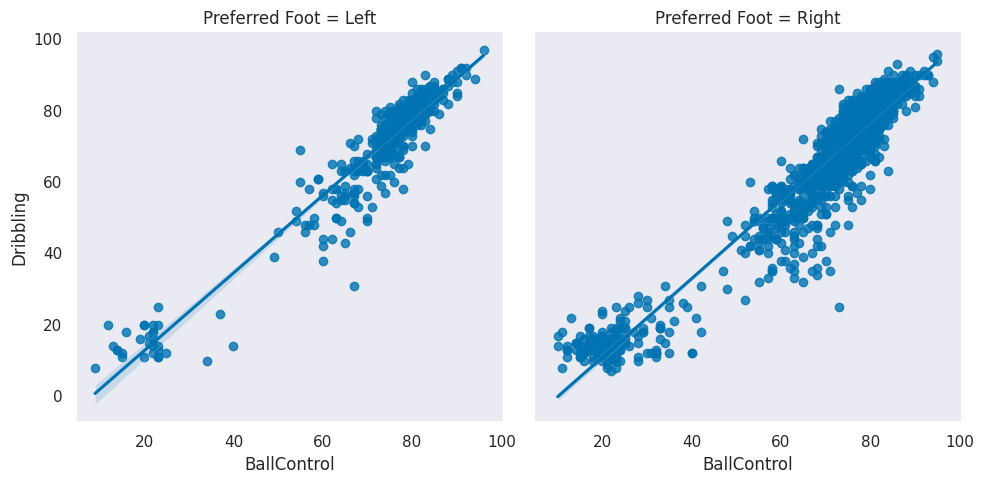

In [ ]:
# comparing the performance of left-footed and right-footed footballers
# ballcontrol vs dribbing

sns.lmplot(x = 'BallControl', y ='Dribbling', data = data, col = 'Preferred Foot')

In [ ]:
# visualizing clubs with highest number of different countries

data.groupby(data['Club'])['Nationality'].nunique().sort_values(ascending = False).head(10)

Club
Napoli               18
West Ham United      16
Lazio                16
Newcastle United     15
AS Monaco            15
Arsenal              14
Borussia Dortmund    13
FC Schalke 04        13
Tottenham Hotspur    13
Inter                13
Name: Nationality, dtype: int64

In [ ]:
# visualizing clubs with highest number of different countries

data.groupby(data['Club'])['Nationality'].nunique().sort_values(ascending = True).head(10)

Club
1. FC Heidenheim 1846    1
New York Red Bulls       1
Cruzeiro                 1
Norwich City             1
Once Caldas              1
Colo-Colo                1
Palermo                  1
Club Necaxa              1
Panathinaikos FC         1
Paraná                   1
Name: Nationality, dtype: int64